# Exploración de datos

In [35]:
import sys
import os
from functools import reduce

project_path = os.path.abspath('..')
sys.path.insert(1, project_path)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from src.utils import get_project_root
from src.data.make_dataset import get_minma_data

Para una exploración inicial de los datos, se utilizarán datos desde 5 años atrás de las siguientes variables presentes en ambas estaciones:
- SO2
- NO2
- NO
- NOX
- O3
- CO
- Dirección del viento
- Velocidad del viento

In [36]:
params = ['SO2','NO2', 'NO', 'NOX', 'O3', 'CO']
from_last = '5y'

## Maitenes

In [37]:
maitenes_df = get_minma_data(params, 'maitenes', from_last=from_last)
maitenes_df.head()

C:\Users\consu\AppData\Local\Temp\ipykernel_12356\4118557904.py:1: FutureWarning: Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version.
  maitenes_df = get_minma_data(params, 'maitenes', from_last=from_last)


Registros validados_SO2  Registros preliminares_SO2  \
2017-09-06 18:00:00                      NaN                         NaN   
2017-09-06 19:00:00                      NaN                         NaN   
2017-09-06 20:00:00                      NaN                         NaN   
2017-09-06 21:00:00                      NaN                         NaN   
2017-09-06 22:00:00                      NaN                         NaN   

                     Registros no validados_SO2  Registros validados_NO2  \
2017-09-06 18:00:00                        3.22                      NaN   
2017-09-06 19:00:00                        3.58                      NaN   
2017-09-06 20:00:00                        7.39                      NaN   
2017-09-06 21:00:00                        6.40                      NaN   
2017-09-06 22:00:00                        4.77                      NaN   

                     Registros preliminares_NO2  Registros no validados_NO2  \
2017-09-06 18:00:00                         NaN                        2.16   
2017-09-06 19:00:00                         NaN                        3.25   
2017-09-06 20:00:00                         NaN                       13.01   
2017-09-06 21:00:00                         NaN                       12.33   
2017-09-06 22:00:00                         NaN                        7.22   

                     Registros validados_NO  Registros preliminares_NO  \
2017-09-06 18:00:00                     NaN                        NaN   
2017-09-06 19:00:00                     NaN                        NaN   
2017-09-06 20:00:00                     NaN                        NaN   
2017-09-06 21:00:00                     NaN                        NaN   
2017-09-06 22:00:00                     NaN                        NaN   

                     Registros no validados_NO  Registros validados_NOX  \
2017-09-06 18:00:00                    2.01888                      NaN   
2017-09-06 19:00:00                    2.20725                      NaN   
2017-09-06 20:00:00                    2.41338                      NaN   
2017-09-06 21:00:00                    2.38637                      NaN   
2017-09-06 22:00:00                    2.31295                      NaN   

                     Registros preliminares_NOX  Registros no validados_NOX  \
2017-09-06 18:00:00                         NaN                     4.18258   
2017-09-06 19:00:00                         NaN                     5.46078   
2017-09-06 20:00:00                         NaN                    15.42390   
2017-09-06 21:00:00                         NaN                    14.72000   
2017-09-06 22:00:00                         NaN                     9.53500   

                     Registros validados_O3  Registros preliminares_O3  \
2017-09-06 18:00:00                     NaN                        NaN   
2017-09-06 19:00:00                     NaN                        NaN   
2017-09-06 20:00:00                     NaN                        NaN   
2017-09-06 21:00:00                     NaN                        NaN   
2017-09-06 22:00:00                     NaN                        NaN   

                     Registros no validados_O3  Registros validados_CO  \
2017-09-06 18:00:00                       21.0                     NaN   
2017-09-06 19:00:00                       18.0                     NaN   
2017-09-06 20:00:00                        9.0                     NaN   
2017-09-06 21:00:00                       10.0                     NaN   
2017-09-06 22:00:00                       13.0                     NaN   

                     Registros preliminares_CO  Registros no validados_CO  
2017-09-06 18:00:00                        NaN                       0.22  
2017-09-06 19:00:00                        NaN                       0.25  
2017-09-06 20:00:00                        NaN                       0.29  
2017-09-06 21:00:00                        NaN                     

In [38]:
maitenes_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43830 entries, 2017-09-06 18:00:00 to 2022-09-06 23:00:00
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Registros validados_SO2     0 non-null      float64
 1   Registros preliminares_SO2  0 non-null      float64
 2   Registros no validados_SO2  43346 non-null  float64
 3   Registros validados_NO2     0 non-null      float64
 4   Registros preliminares_NO2  0 non-null      float64
 5   Registros no validados_NO2  43114 non-null  float64
 6   Registros validados_NO      0 non-null      float64
 7   Registros preliminares_NO   0 non-null      float64
 8   Registros no validados_NO   42863 non-null  float64
 9   Registros validados_NOX     0 non-null      float64
 10  Registros preliminares_NOX  0 non-null      float64
 11  Registros no validados_NOX  43211 non-null  float64
 12  Registros validados_O3      0 non-null      float64
 

Se observa que de las columnas, las únicas que poseen datos son aquellas que tienen datos preliminares, por lo que el resto se descartará

In [39]:
cols_to_drop = list(maitenes_df.filter(regex='(?<!no validados)_.*')) 
maitenes_df = maitenes_df.drop(cols_to_drop, axis=1)

Valores nulos

In [40]:
maitenes_df.isna().sum()

Registros no validados_SO2    484
Registros no validados_NO2    716
Registros no validados_NO     967
Registros no validados_NOX    619
Registros no validados_O3     493
Registros no validados_CO     967
dtype: int64

Resumen estadístico

In [41]:
maitenes_df.describe()

Registros no validados_SO2  Registros no validados_NO2  \
count                43346.000000                43114.000000   
mean                     9.014335                    6.027903   
std                     18.902016                    4.473848   
min                      0.030000                    0.000000   
25%                      1.960000                    3.010000   
50%                      2.900000                    4.890000   
75%                      5.840000                    7.540000   
max                    480.250000                   70.190000   

       Registros no validados_NO  Registros no validados_NOX  \
count               42863.000000                43211.000000   
mean                    5.107988                   11.080127   
std                     8.268546                   11.514632   
min                     0.000000                    0.000000   
25%                     1.943910                    5.516775   
50%                     2.970230                    7.858130   
75%                     4.641375                   11.812300   
max                   243.155000                  266.650000   

       Registros no validados_O3  Registros no validados_CO  
count               43337.000000               42863.000000  
mean                   13.732261                   0.268700  
std                     6.504838                   0.137349  
min                     0.000000                   0.000000  
25%                     9.000000                   0.170000  
50%                    13.000000                   0.240000  
75%                    18.000000                   0.340000  
max                    43.000000                   1.080000

Histogramas

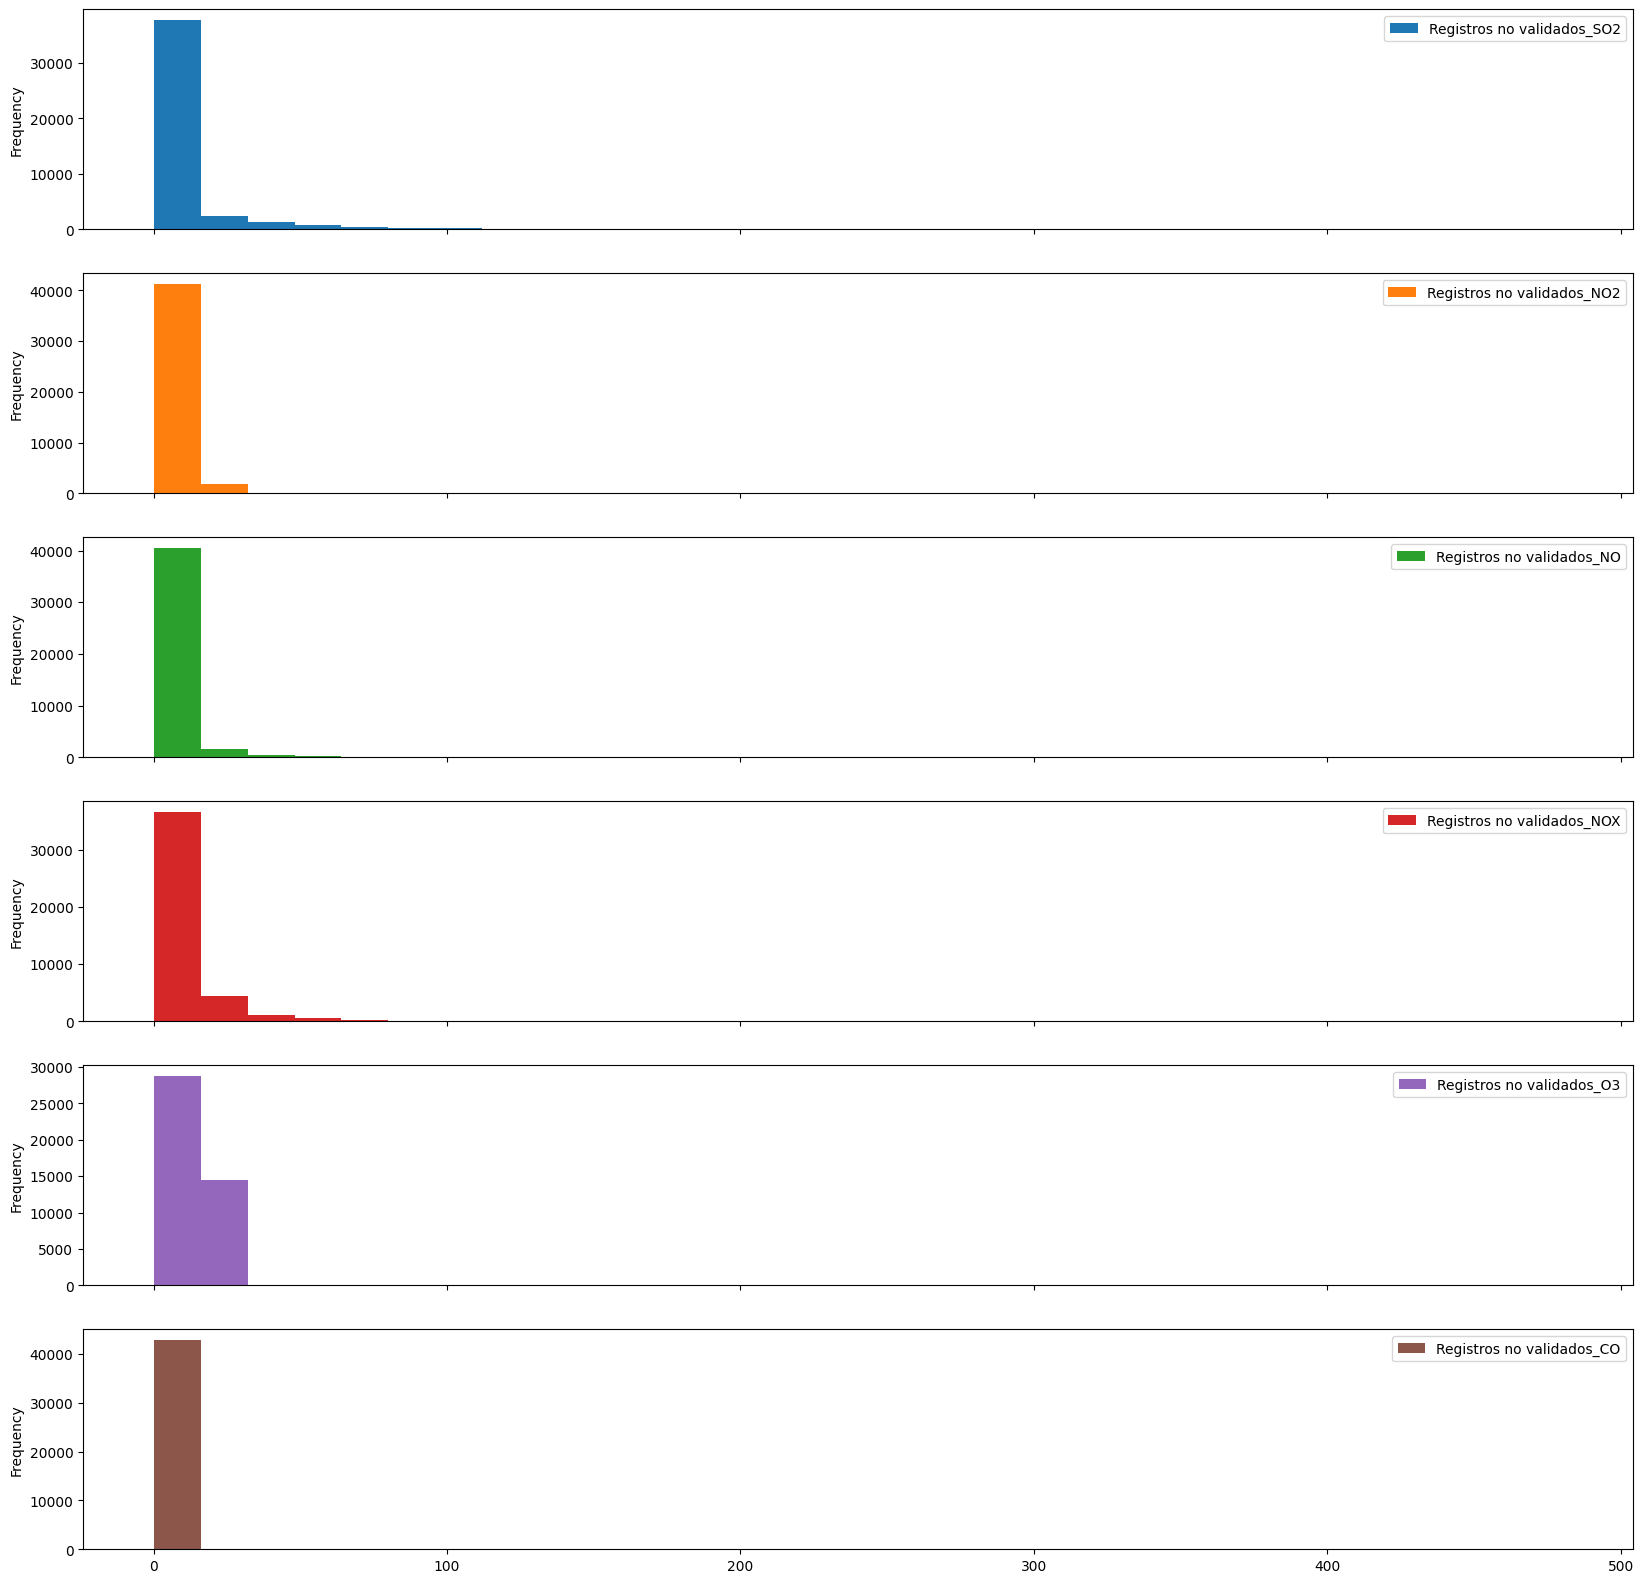

In [42]:
maitenes_df.plot.hist(subplots=True, figsize=(20,20), bins=30)
plt.show()

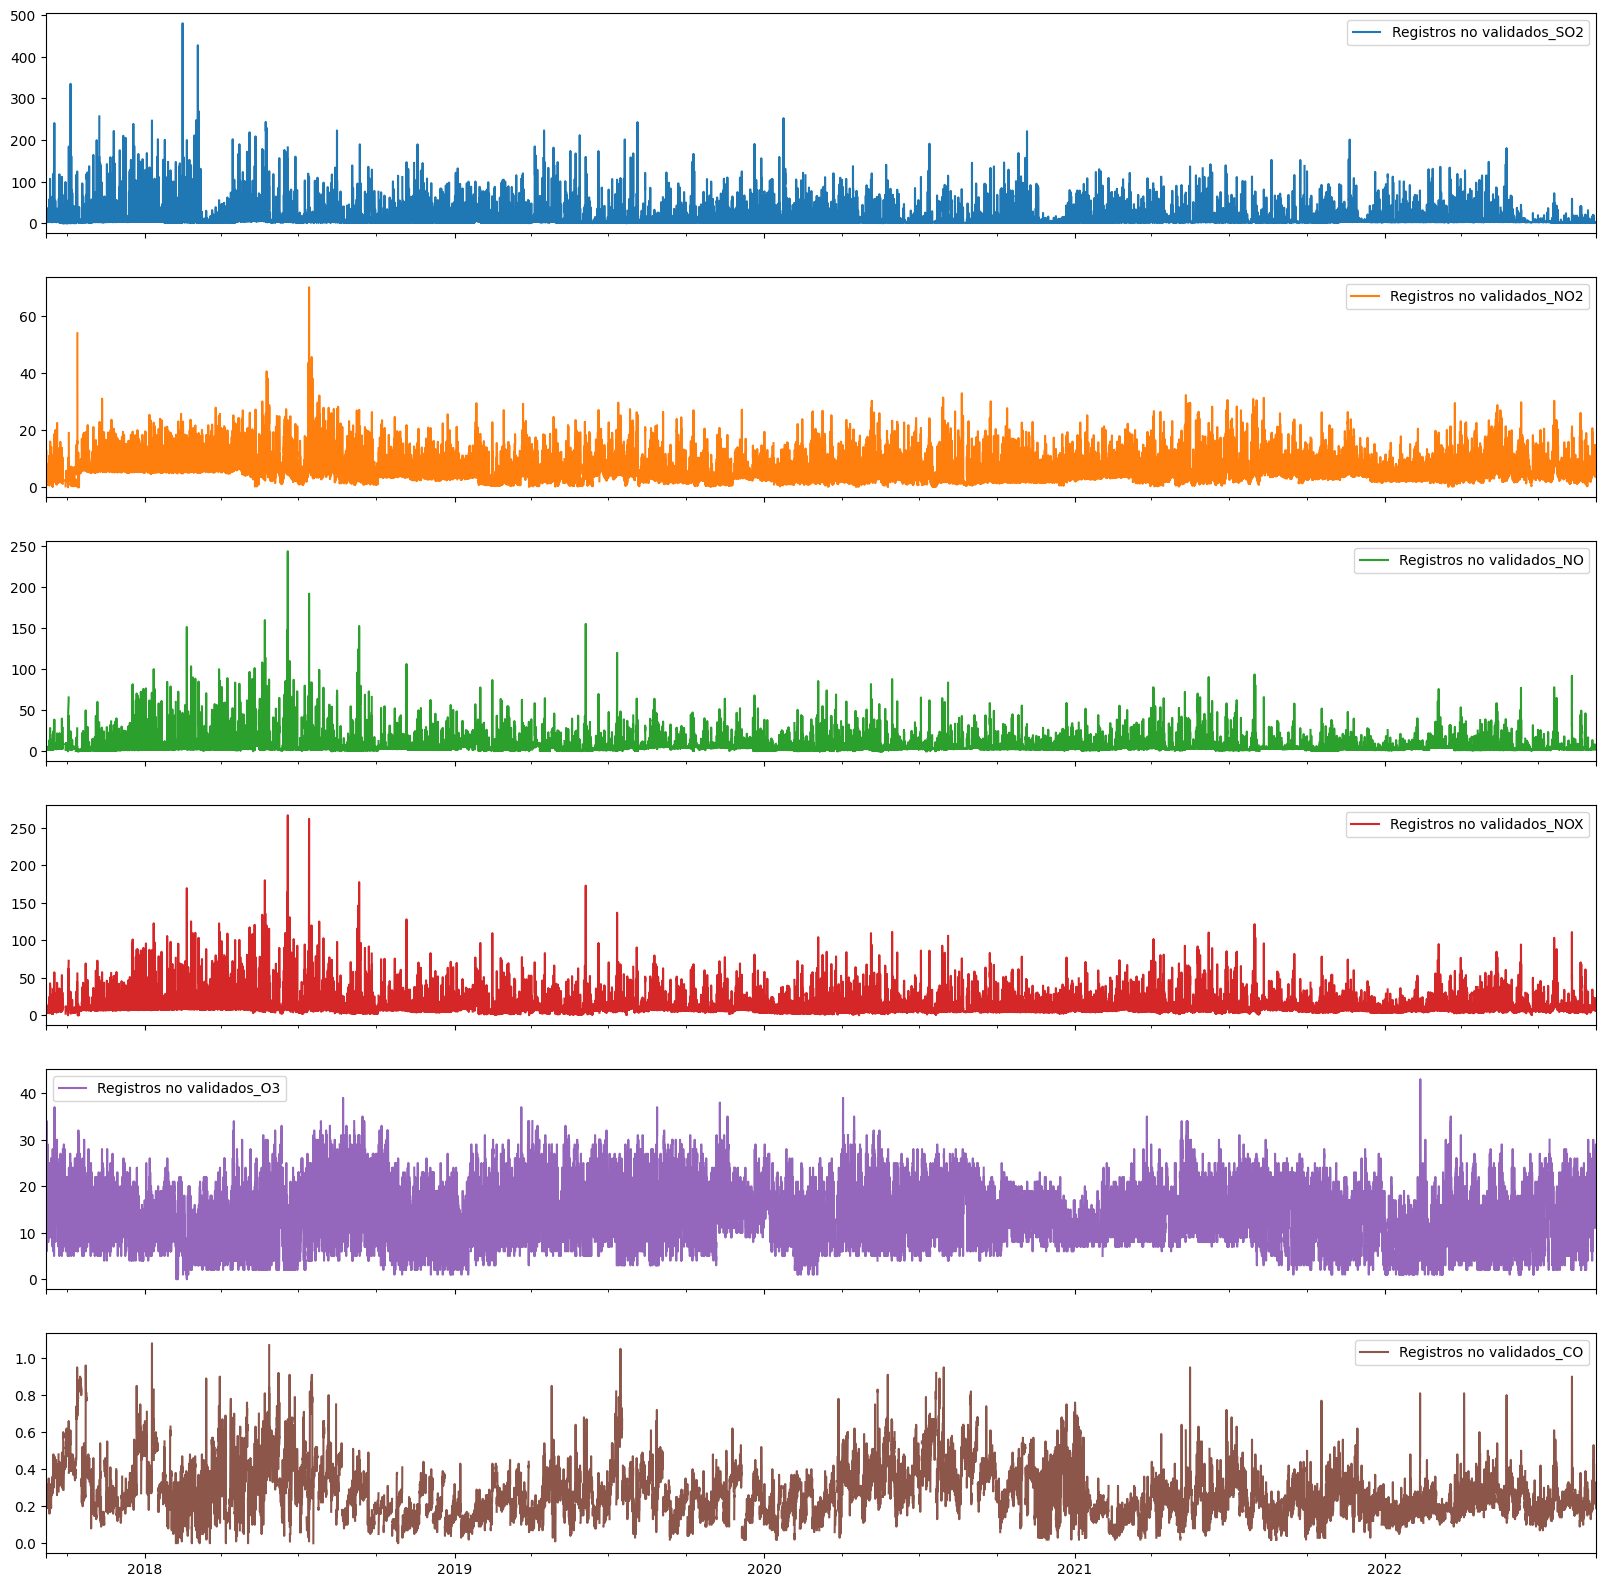

In [43]:
maitenes_df.plot(subplots=True, figsize=(20,20))
plt.show()

In [44]:
def ver_ultima_semana(df, dias_antes = 0):
    df_lw = df.iloc[(-24*dias_antes-168 -1):(-24*dias_antes-1)].interpolate()
    df_lw.plot(subplots=True, figsize=(20,20))
    plt.show()
    return df_lw
    
def ver_ultimo_ano(df, anos = 1, meses_antes = 0):
    df_lw = df.iloc[(-24*30*meses_antes-24*365*anos -1):(-24*30*meses_antes-1)].interpolate()
    df_lw.plot(subplots=True, figsize=(20,20))
    plt.show()
    return df_lw

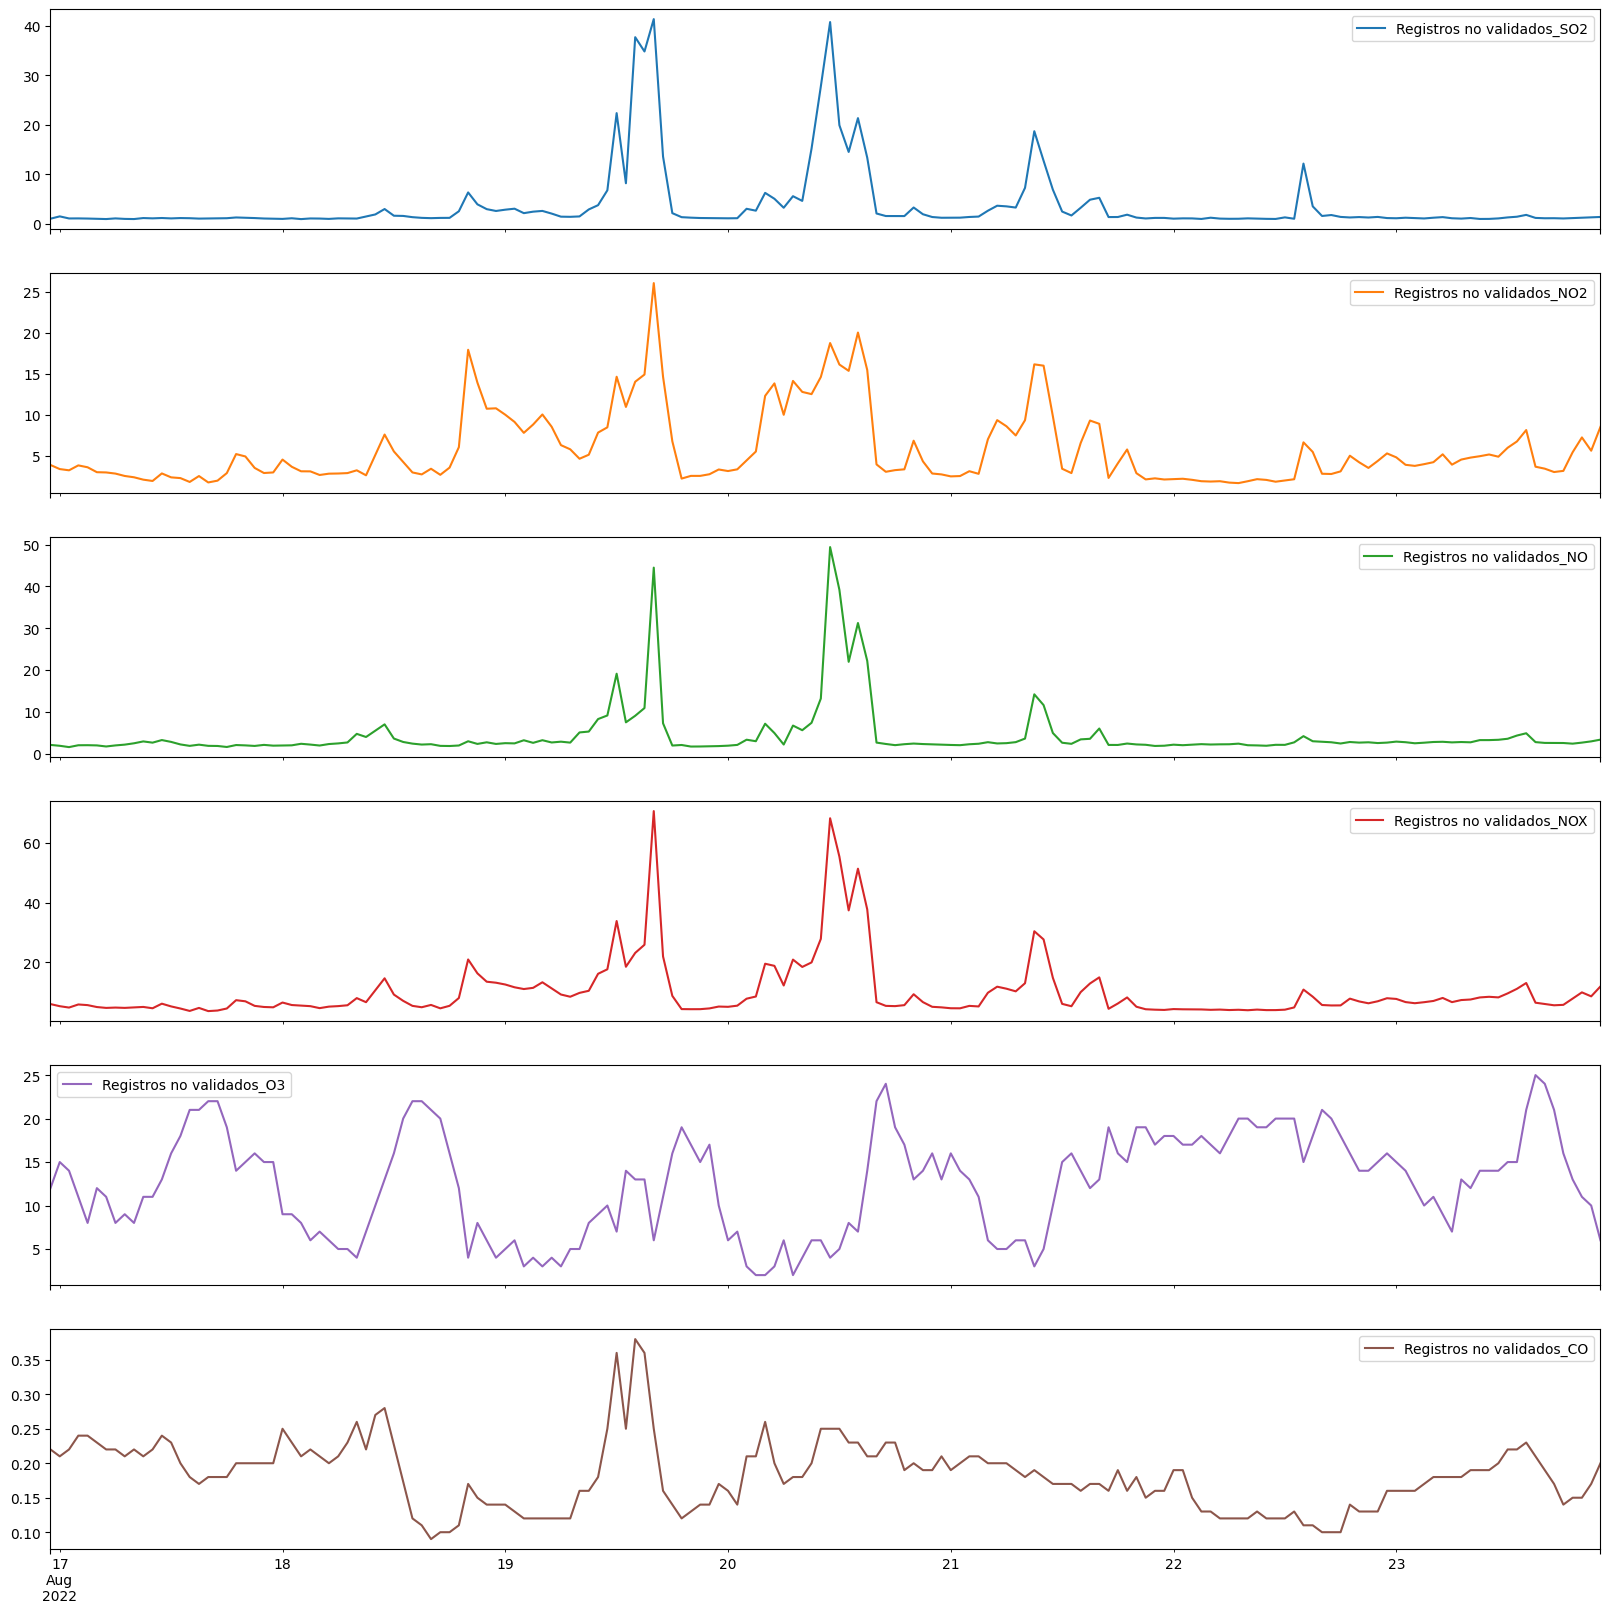

Registros no validados_SO2  Registros no validados_NO2  \
2022-08-16 23:00:00                        1.06                        3.91   
2022-08-17 00:00:00                        1.53                        3.41   
2022-08-17 01:00:00                        1.11                        3.26   
2022-08-17 02:00:00                        1.12                        3.86   
2022-08-17 03:00:00                        1.09                        3.63   
...                                         ...                         ...   
2022-08-23 18:00:00                        1.11                        3.19   
2022-08-23 19:00:00                        1.18                        5.46   
2022-08-23 20:00:00                        1.23                        7.27   
2022-08-23 21:00:00                        1.32                        5.65   
2022-08-23 22:00:00                        1.41                        8.56   

                     Registros no validados_NO  Registros no validados_NOX  \
2022-08-16 23:00:00                    2.11563                     6.02782   
2022-08-17 00:00:00                    1.90915                     5.31537   
2022-08-17 01:00:00                    1.59522                     4.85887   
2022-08-17 02:00:00                    2.03638                     5.89370   
2022-08-17 03:00:00                    2.05167                     5.67692   
...                                        ...                         ...   
2022-08-23 18:00:00                    2.57390                     5.76787   
2022-08-23 19:00:00                    2.41897                     7.87648   
2022-08-23 20:00:00                    2.66727                     9.94199   
2022-08-23 21:00:00                    2.96410                     8.60928   
2022-08-23 22:00:00                    3.37903                    11.93580   

                     Registros no validados_O3  Registros no validados_CO  
2022-08-16 23:00:00                       12.0                       0.22  
2022-08-17 00:00:00                       15.0                       0.21  
2022-08-17 01:00:00                       14.0                       0.22  
2022-08-17 02:00:00                       11.0                       0.24  
2022-08-17 03:00:00                        8.0                       0.24  
...                                        ...                        ...  
2022-08-23 18:00:00                       16.0                       0.14  
2022-08-23 19:00:00                       13.0                       0.15  
2022-08-23 20:00:00                       11.0                       0.15  
2022-08-23 21:00:00                       10.0                       0.17  
2022-08-23 22:00:00                        6.0                       0.20  

[168 rows x 6 columns]

In [45]:
ver_ultima_semana(maitenes_df, dias_antes = 14)

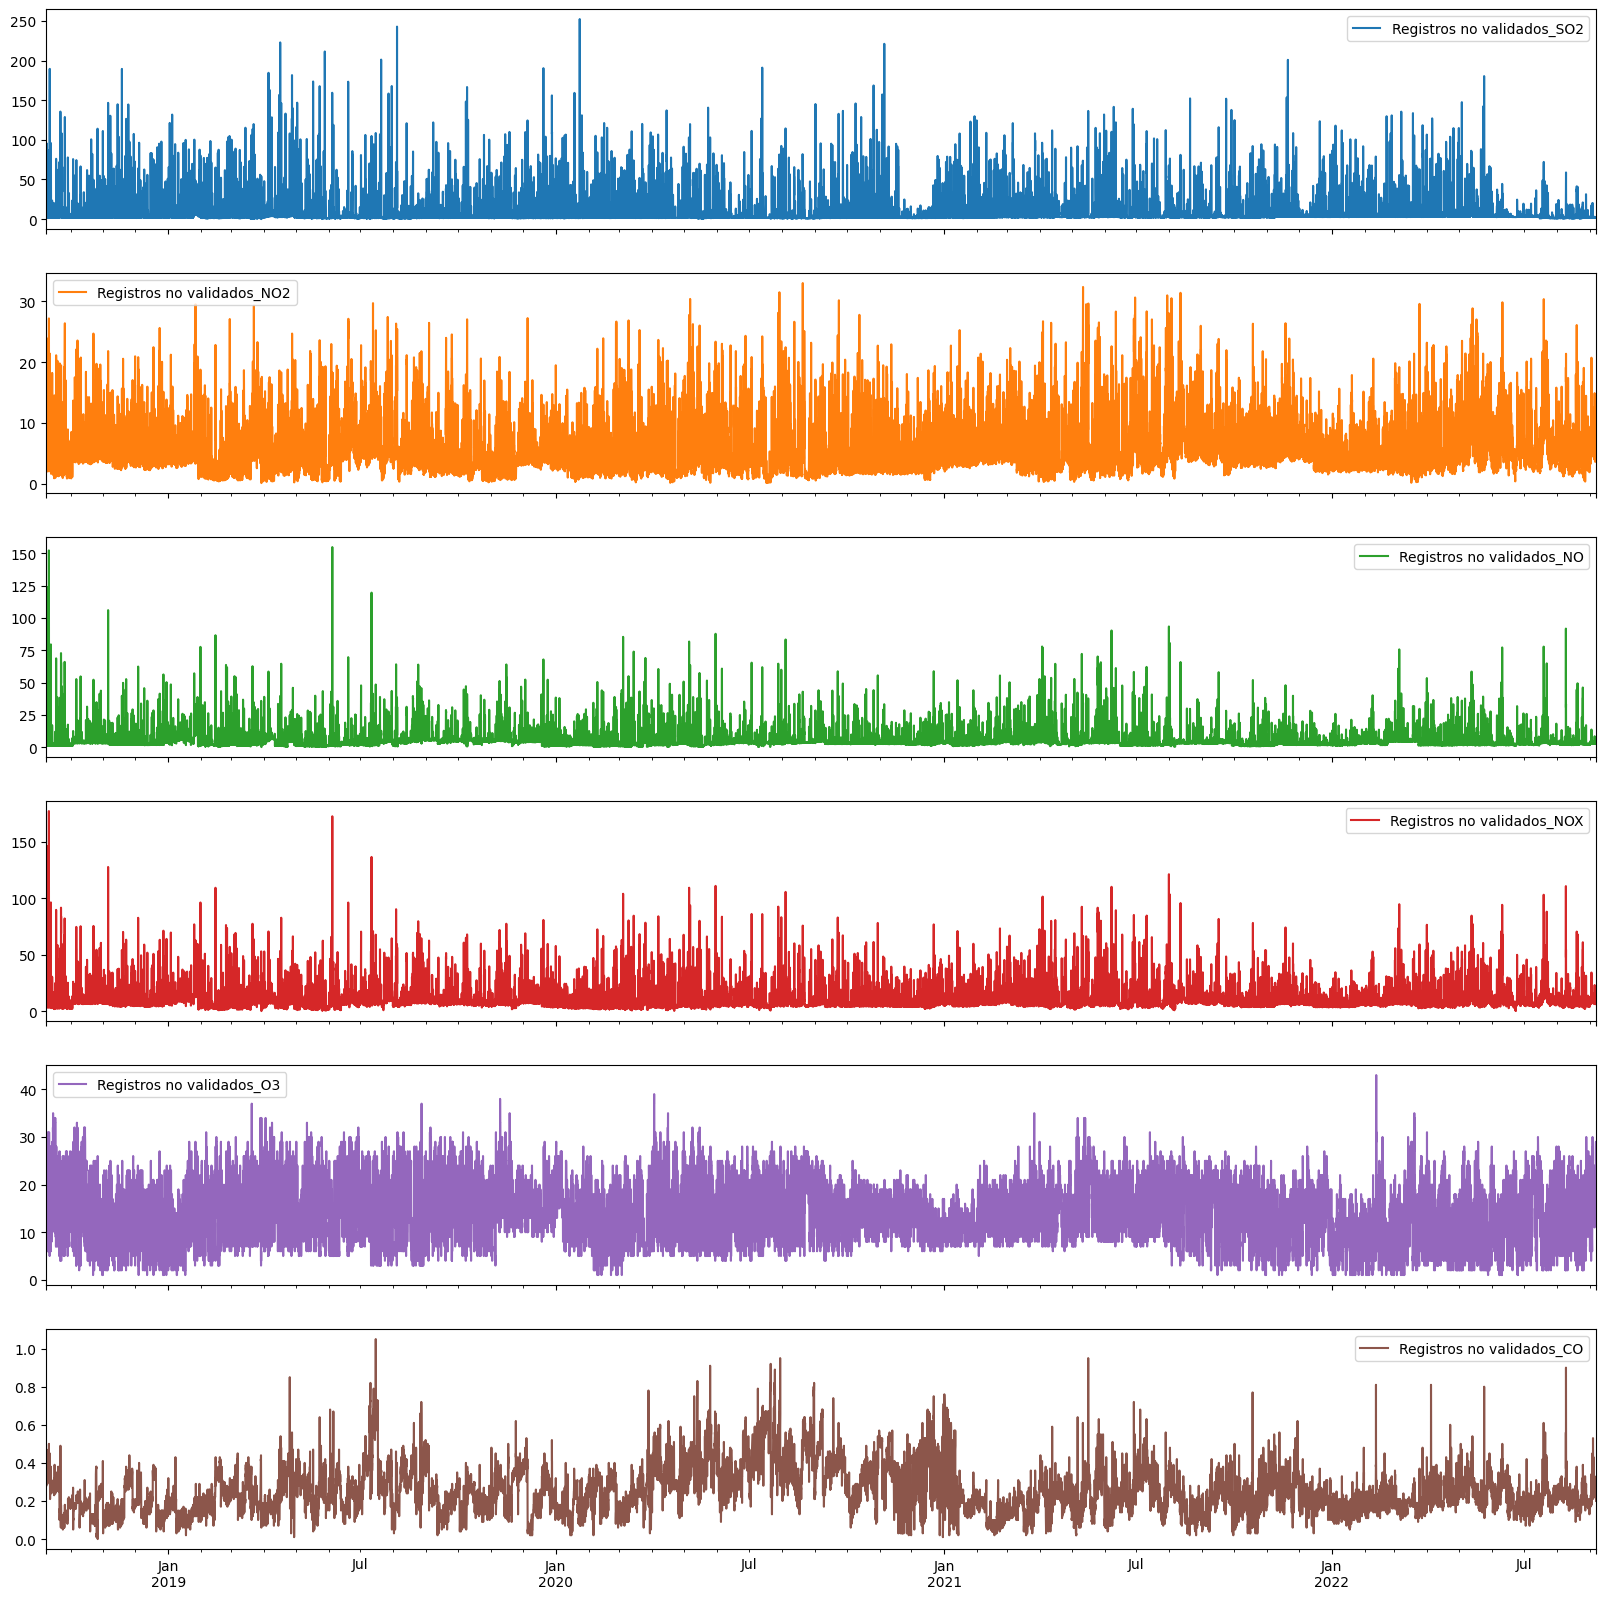

In [46]:
df_4anos = ver_ultimo_ano(maitenes_df, anos = 4)

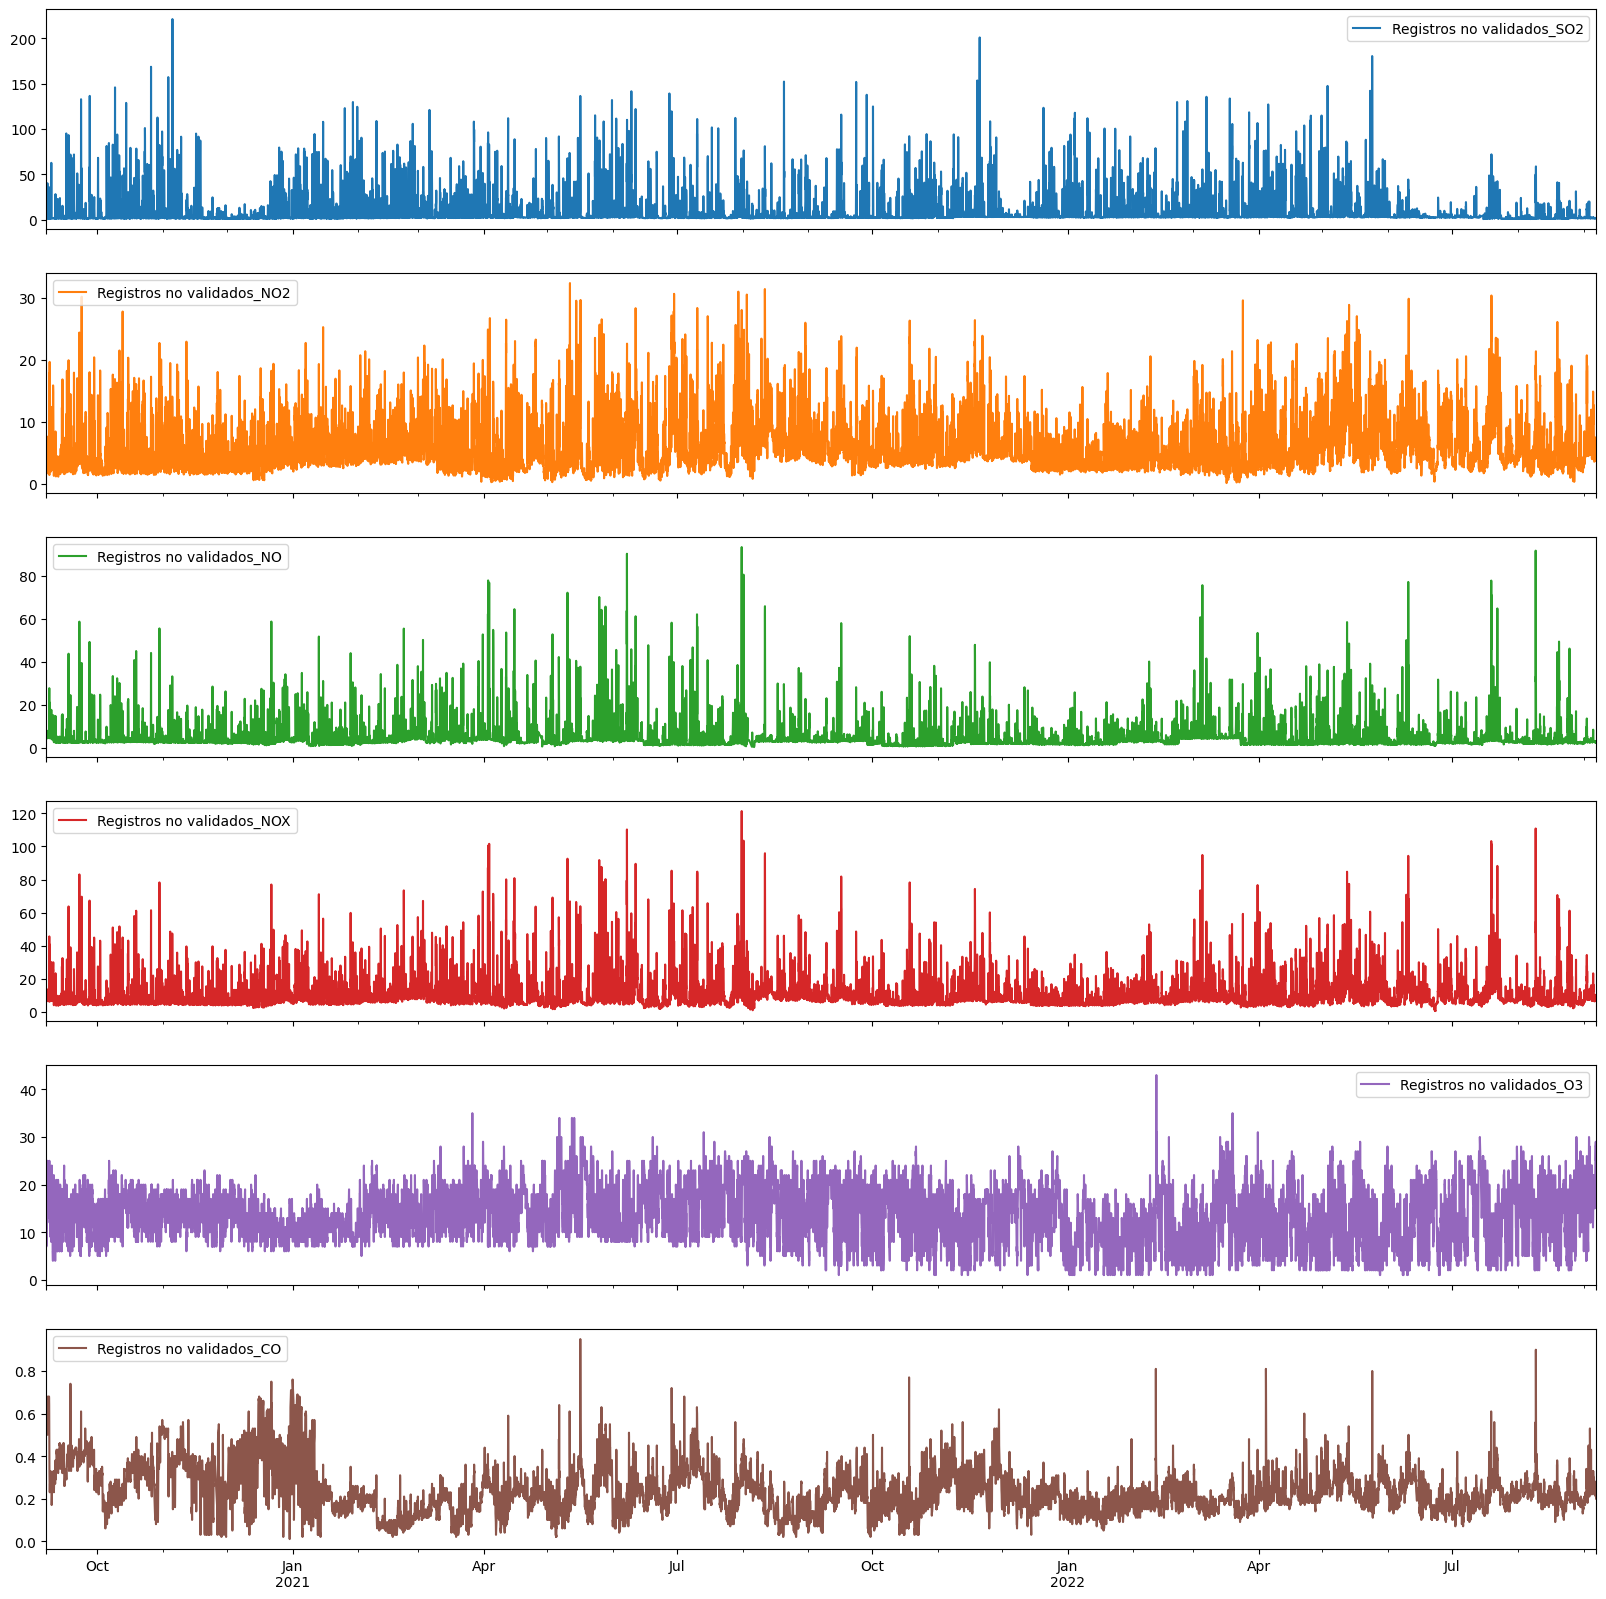

Registros no validados_SO2  Registros no validados_NO2  \
day month                                                           
1   1                        8.668125                    4.073542   
    2                        9.131875                    4.969375   
    3                       10.364583                    6.997708   
    4                        9.898958                    7.127708   
    5                       12.488333                    6.138750   
...                               ...                         ...   
31  5                       10.938854                    8.445937   
    7                       10.863958                   10.303750   
    8                        4.855833                    4.773333   
    10                      14.029167                    6.945625   
    12                       7.050625                    4.875208   

           Registros no validados_NO  Registros no validados_NOX  \
day month                                                          
1   1                       3.025371                    7.098707   
    2                       3.504064                    8.472676   
    3                       8.534559                   15.531941   
    4                       6.183394                   13.311220   
    5                       5.409797                   11.549093   
...                              ...                         ...   
31  5                       5.550677                   13.996371   
    7                       9.981481                   20.285272   
    8                       2.925586                    7.699492   
    10                      3.854094                   10.800099   
    12                      3.085072                    7.960270   

           Registros no validados_O3  Registros no validados_CO  
day month                                                        
1   1                       8.916667                   0.332083  
    2                      12.447917                   0.180625  
    3                      12.250000                   0.182708  
    4                      14.333333                   0.264583  
    5                       9.187500                   0.216042  
...                              ...                        ...  
31  5                      13.427083                   0.265833  
    7                      14.597917                   0.269167  
    8                      17.166667                   0.140625  
    10                     13.645833                   0.368542  
    12                      9.937500                   0.335000  

[365 rows x 6 columns]

In [47]:
df_2anos = ver_ultimo_ano(maitenes_df, anos = 2)
df_2anos["day"] = df_2anos.index.day
df_2anos["month"] = df_2anos.index.month
df_2anos.groupby(["day", "month"]).mean()

Visualización basada en:
https://github.com/KishManani/MSTL/blob/main/mstl_decomposition.ipynb

In [48]:
import seaborn as sns
from scipy.stats import circmean

In [49]:
def plot_por_mes(timeseries, col, log = False, circular = False):
    # Plot the electricity demand for each day
    fig, ax = plt.subplots(nrows=2, ncols=3, figsize=[15, 10], sharey=True)
    ax = ax.flatten()
    sns_blue = sns.color_palette(as_cmap=True)[0]
    MONTHS = ["Jan", "Feb", "Mar", "Apr", "May", "Jun"]
    for ix, month in enumerate(MONTHS):

        # Plot individual ts
        daily_ts = []
        for _, ts in (
            timeseries[[col, "day_of_month", "month"]]
            .query(f"month == {ix+1}")
            .groupby("day_of_month")
        ):
            daily_ts.append(ts.reset_index()[col])
            ts.reset_index()[col].plot(
                alpha=0.1, ax=ax[ix], color=sns_blue, label="_no_legend_"
            )
            ax[ix].set_xticks(np.arange(0, len(ts) + 1, 8))
            ax[ix].set_title(month)

        # Plot the mean ts
        if not circular:
            pd.concat(daily_ts, axis=1).mean(axis=1).plot(
                ax=ax[ix], color="blue", label="mean", legend=True
            )
        else:
            pd.concat(daily_ts, axis=1).apply(lambda x: circmean(x),axis=1).plot(
                ax=ax[ix], color="blue", label="mean", legend=True
            )
        ax[ix].legend(loc="upper left", frameon=False)
        if log:
            ax[ix].set_yscale('log')

        if month in ("Jan", "Feb"):
            ax[ix].tick_params(
                axis="x", which="both", bottom=False, top=False, labelbottom=False
            )

    fig.text(0.5, -0.02, "Hora del día", ha="center")
    fig.text(-0.02, 0.5, "Concentración", va="center", rotation="vertical")
    fig.suptitle("Emisiones de {} medidas cada día según el mes, en la estación Con Cón".format(col))
    #fig.delaxes(ax[-1])
    fig.tight_layout()
    plt.show()

def plot_por_semana(timeseries, col, log = False, circular = False):
    fig, ax = plt.subplots(figsize=[20, 10])
    weekly_ts = []
    sns_blue = sns.color_palette(as_cmap=True)
    DAYS = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
    for week, ts in timeseries.groupby("week"):
        weekly_ts.append(ts.reset_index()[col])
        ts.reset_index()[col].plot(alpha=0.1, ax=ax, label="_no_legend_", color=sns_blue)
        plt.xticks(ticks=np.arange(0, 167, 24), labels=DAYS)

    pd.concat(weekly_ts, axis=1).mean(axis=1).plot(
        ax=ax, color="blue", label="mean", legend=True
    )

    ax.set_ylabel("Concentración")
    ax.set_title("Emisiones de {} medidas cada día de la semana en la estación Maitenes".format(col))
    ax.set_xlabel("Día de la semana")
    if log:
            ax.set_yscale('log')
    ax.legend(loc="upper right", frameon=False)

    plt.tight_layout()
    plt.show()
    
def plot_por_ano(timeseries, col, circular = False):
    fig, ax = plt.subplots(figsize=[20, 10])
    yearly_ts = []
    sns_blue = sns.color_palette(as_cmap=True)
    MONTHS = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    for month, ts in timeseries.groupby("year"):
        ts = ts.groupby(["month","day_of_month"]).mean()
        #print(ts.reset_index())
        yearly_ts.append(ts.reset_index()[col])
        ts.reset_index()[col].plot(alpha=0.1, ax=ax, label="_no_legend_", color=sns_blue)
        plt.xticks(ticks= [0, 31, 59, 90, 120, 151, 181, 212, 242, 273, 303, 334], labels=MONTHS)

    pd.concat(yearly_ts, axis=1).mean(axis=1).plot(
        ax=ax, color="blue", label="mean", legend=True
    )

    ax.set_ylabel("Concentración")
    ax.set_title("Emisiones de {} medidas cada mes en la estación ConCon".format(col))
    ax.set_xlabel("Mes")
    ax.legend(loc="upper right", frameon=False)

    plt.tight_layout()
    plt.show()
    
def visualizar_trends(df, col = "SO2", ano_0 = 2021, log = False, circular = False):
    timeseries = df
    timeseries['Fecha'] = timeseries.index
    timeseries = timeseries.rename(columns={"Registros no validados_SO2": "SO2", "Registros no validados_NO2": "NO2", "Registros no validados_NO": "NO", "Registros no validados_NOX": "NOX", "Registros no validados_O3": "O3", "Registros no validados_CO": "CO"})
    
    # Filter for first 149 days of 2021.
    start_date = pd.to_datetime("{}-01-01".format(ano_0))
    end_date = start_date + pd.Timedelta("180D")
    mask = (timeseries["Fecha"] >= start_date) & (timeseries["Fecha"] < end_date)
    #mask = (timeseries.index >= start_date) & (timeseries.index < end_date)
    #timeseries_full = timeseries
    
    # Resample to hourly
    
    # Compute date time variables used later in plotting
    timeseries["week"] = timeseries.index.isocalendar().week
    timeseries["day_of_month"] = timeseries.index.day
    timeseries["month"] = timeseries.index.month
    timeseries["year"] = timeseries.index.year
    timeseries_full = timeseries
    timeseries = timeseries[mask]
    timeseries = timeseries.set_index("Fecha").resample("H").sum()
    plot_por_mes(timeseries, col, log = log, circular = circular)
    plot_por_semana(timeseries, col, log = log, circular = circular)
    plot_por_ano(timeseries_full, col, circular =  circular)
    
    

ValueError: No objects to concatenate

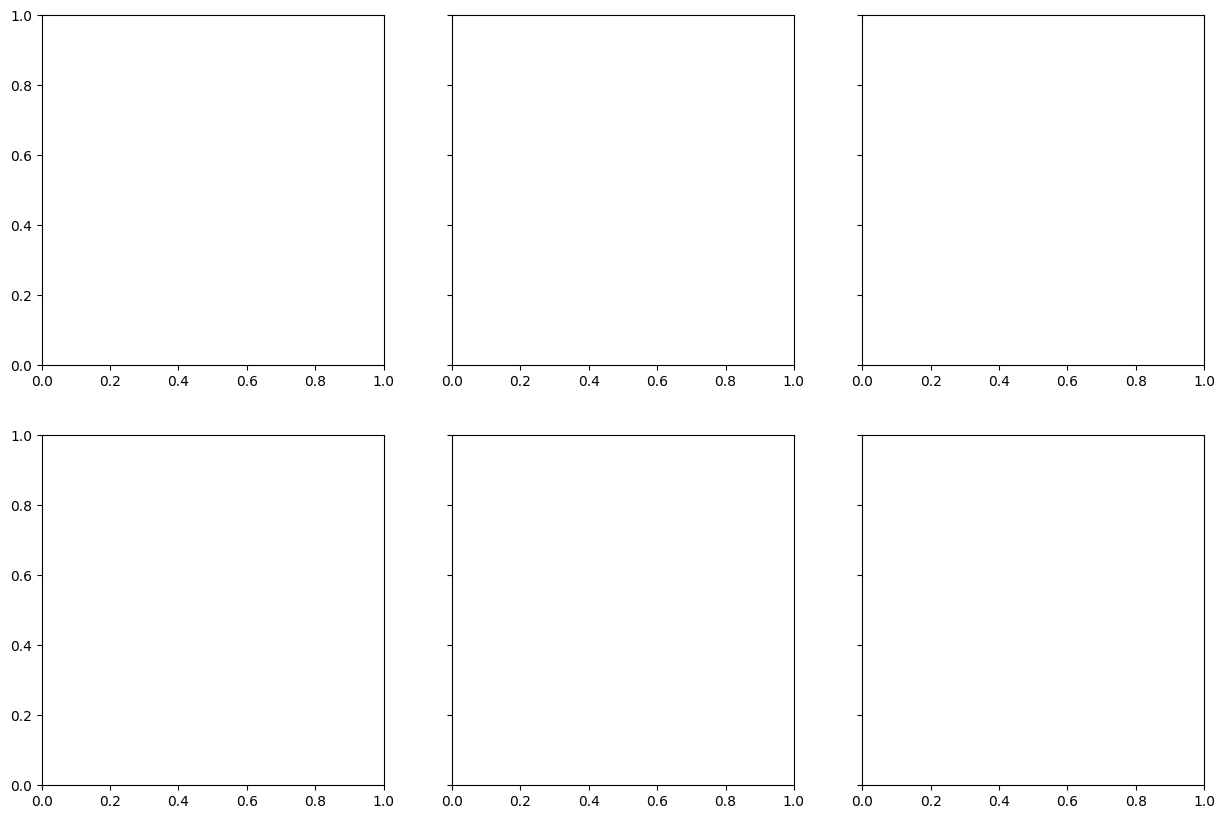

In [50]:
visualizar_trends(df_2anos, col = "SO2", ano_0=2019, log=True)

ValueError: No objects to concatenate

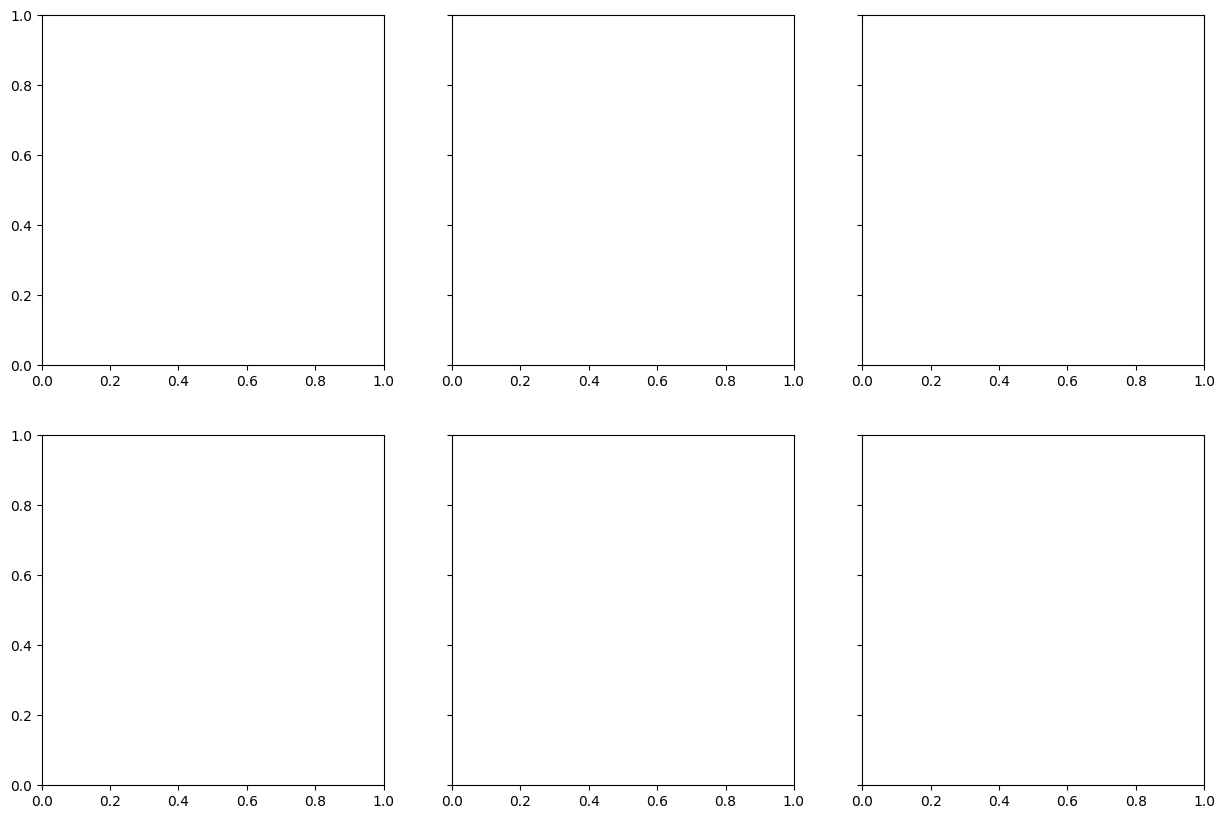

In [ ]:
visualizar_trends(df_2anos, col = "O3", ano_0=2019)

In [ ]:
import statsmodels.tsa.seasonal as Seasonal

ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
STL = Seasonal.STL

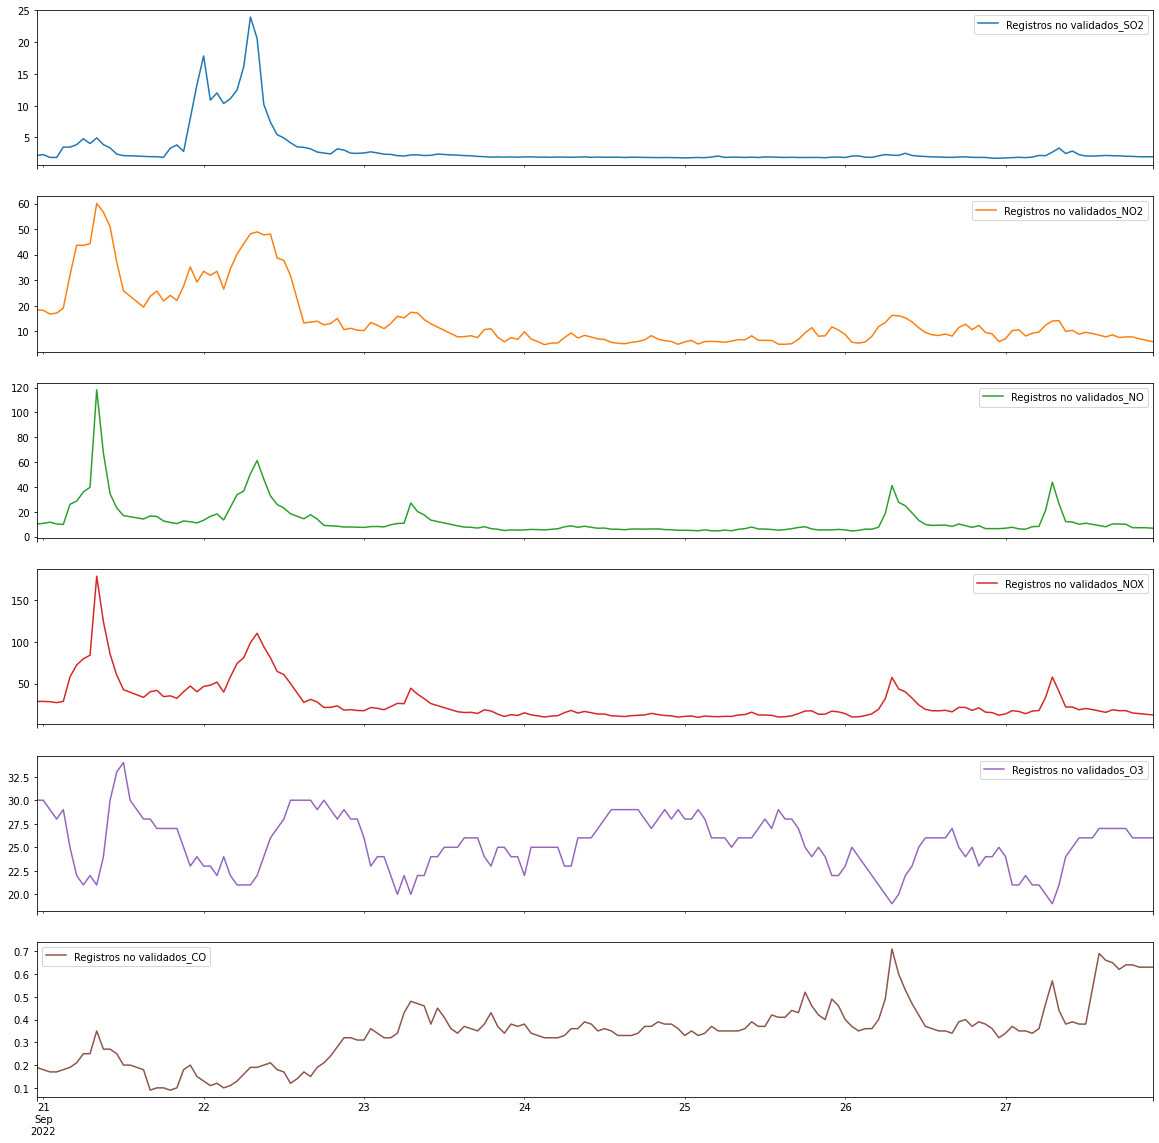

In [ ]:
dataso = ver_ultima_semana(concon_df).rename(columns={"Registros no validados_SO2": "SO2", "Registros no validados_NO2": "NO2", "Registros no validados_NO": "NO", "Registros no validados_NOX": "NOX", "Registros no validados_O3": "O3", "Registros no validados_CO": "CO"})

In [ ]:
dataso["day"] = dataso.index.day
dataso["month"] = dataso.index.month
dataso.groupby(["day", "month"]).mean()

SO2        NO2         NO        NOX         O3        CO
day month                                                                
20  9      2.160000  18.430000  10.229300  28.657500  30.000000  0.190000
21  9      3.569167  30.805417  24.233394  55.038721  26.791667  0.188333
22  9      8.190000  28.381042  21.927432  50.307152  26.041667  0.185417
23  9      2.195833  11.040208  10.044926  21.085010  23.791667  0.380000
24  9      1.887500   6.607500   6.385980  12.993767  26.666667  0.352917
25  9      1.878333   7.020833   5.790633  12.811547  26.250000  0.394583
26  9      1.996667  10.258333  11.680745  21.937621  23.666667  0.410000
27  9      2.167826   9.154348  11.528079  20.683700  24.173913  0.497609

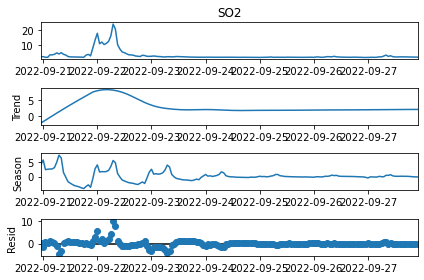

In [ ]:
res = STL(dataso["SO2"]).fit()
res.plot()
plt.show()

# EDA Medium

In [ ]:
concon_df = concon_df.rename(columns={"Registros no validados_SO2": "SO2", "Registros no validados_NO2": "NO2", "Registros no validados_NO": "NO", "Registros no validados_NOX": "NOX", "Registros no validados_O3": "O3", "Registros no validados_CO": "CO"})
concon_df

SO2   NO2       NO       NOX    O3    CO  \
2017-09-27 18:00:00  1.32  9.01  7.99708  17.00820  22.0  0.66   
2017-09-27 19:00:00  1.19  8.25  7.47957  15.72780  22.0  0.52   
2017-09-27 20:00:00  1.21  6.56  5.00489  11.56530  23.0  0.56   
2017-09-27 21:00:00  1.45  6.26  3.48237   9.73781  24.0  0.49   
2017-09-27 22:00:00  4.04  4.97  3.07353   8.04764  25.0  0.48   
...                   ...   ...      ...       ...   ...   ...   
2022-09-27 19:00:00  2.02  7.77  7.23187  15.00580  26.0  0.64   
2022-09-27 20:00:00  1.97  7.04  7.23932  14.27470  26.0  0.63   
2022-09-27 21:00:00  1.96  6.48  7.18593  13.66950  26.0  0.63   
2022-09-27 22:00:00  1.96  5.91  6.80318  12.71370  26.0  0.63   
2022-09-27 23:00:00  1.93  6.02  7.24060  13.26230  27.0  0.62   

                                  Fecha  
2017-09-27 18:00:00 2017-09-27 18:00:00  
2017-09-27 19:00:00 2017-09-27 19:00:00  
2017-09-27 20:00:00 2017-09-27 20:00:00  
2017-09-27 21:00:00 2017-09-27 21:00:00  
2017-09-27 22:00:00 2017-09-27 22:00:00  
...                                 ...  
2022-09-27 19:00:00 2022-09-27 19:00:00  
2022-09-27 20:00:00 2022-09-27 20:00:00  
2022-09-27 21:00:00 2022-09-27 21:00:00  
2022-09-27 22:00:00 2022-09-27 22:00:00  
2022-09-27 23:00:00 2022-09-27 23:00:00  

[43830 rows x 7 columns]

In [ ]:
concon_ma_df = get_minma_data(['velviento', 'temp', 'dirviento00'], 'concon', from_last=from_last, n_cols = 3)
concon_ma_df = concon_ma_df.rename(columns={"Unnamed: 2_velviento": "VelViento", "Unnamed: 2_temp": "Temperatura", "Unnamed: 2_dirviento00": "DirViento"})
concon_ma_df.head()

C:\Users\javie\AppData\Local\Temp/ipykernel_15500/1518763491.py:1: FutureWarning: Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version
  concon_ma_df = get_minma_data(['velviento', 'temp', 'dirviento00'], 'concon', from_last=from_last, n_cols = 3)


VelViento  Temperatura  DirViento
2017-09-28 18:00:00   0.701297      12.9519    307.335
2017-09-28 19:00:00   0.189222      12.8652    341.265
2017-09-28 20:00:00   0.713454      12.6152    268.001
2017-09-28 21:00:00   0.835072      12.6785    248.214
2017-09-28 22:00:00   0.205688      12.8185    215.089

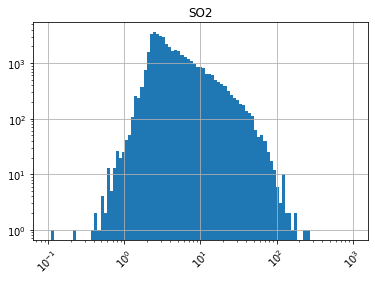

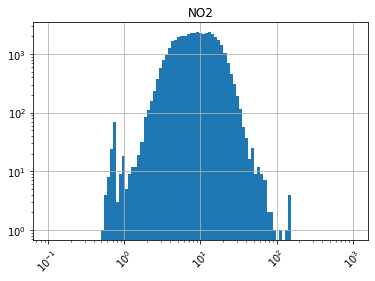

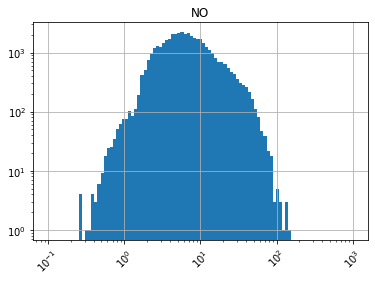

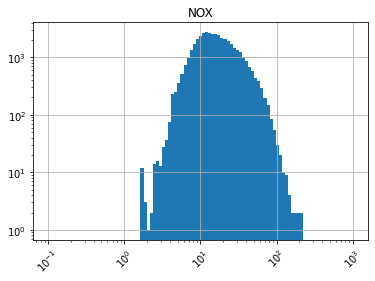

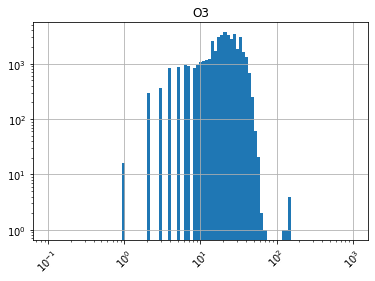

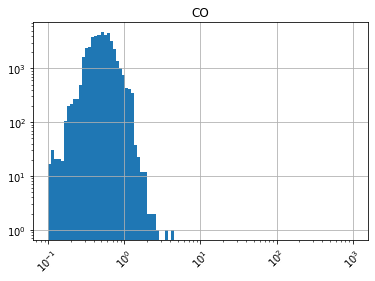

In [ ]:
for col in ['SO2','NO2','NO','NOX', 'O3', 'CO']:
    concon_df.hist(col, bins = np.logspace(-1,3,100), log =True)
    #sns.countplot(concon_df[col])
    plt.title(col)
    plt.xscale("log")
    plt.xticks(rotation=45)
    plt.show()

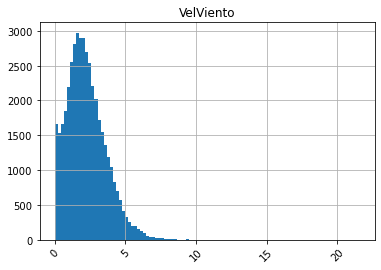

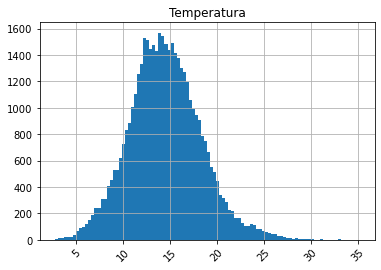

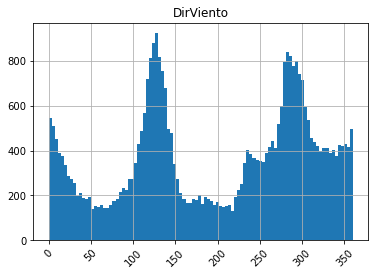

In [ ]:
for col in ['VelViento','Temperatura','DirViento']:
    concon_ma_df.hist(col, bins = 100)
    #sns.countplot(concon_df[col])
    plt.title(col)
    plt.xticks(rotation=45)
    plt.show()

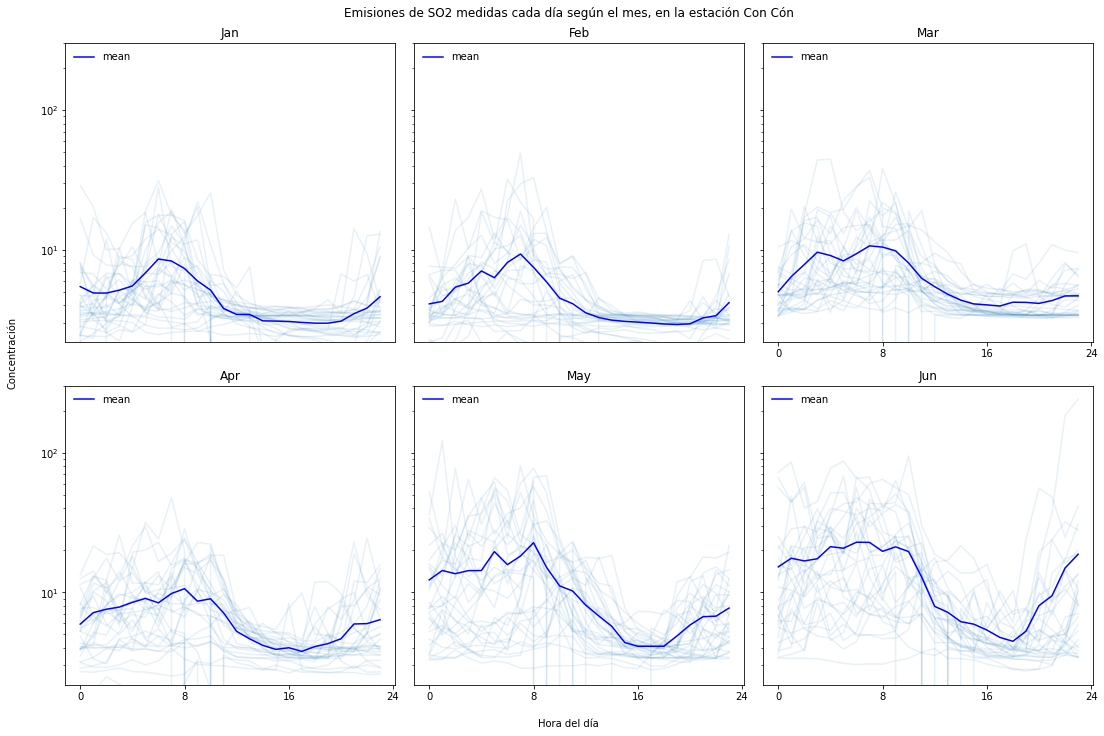

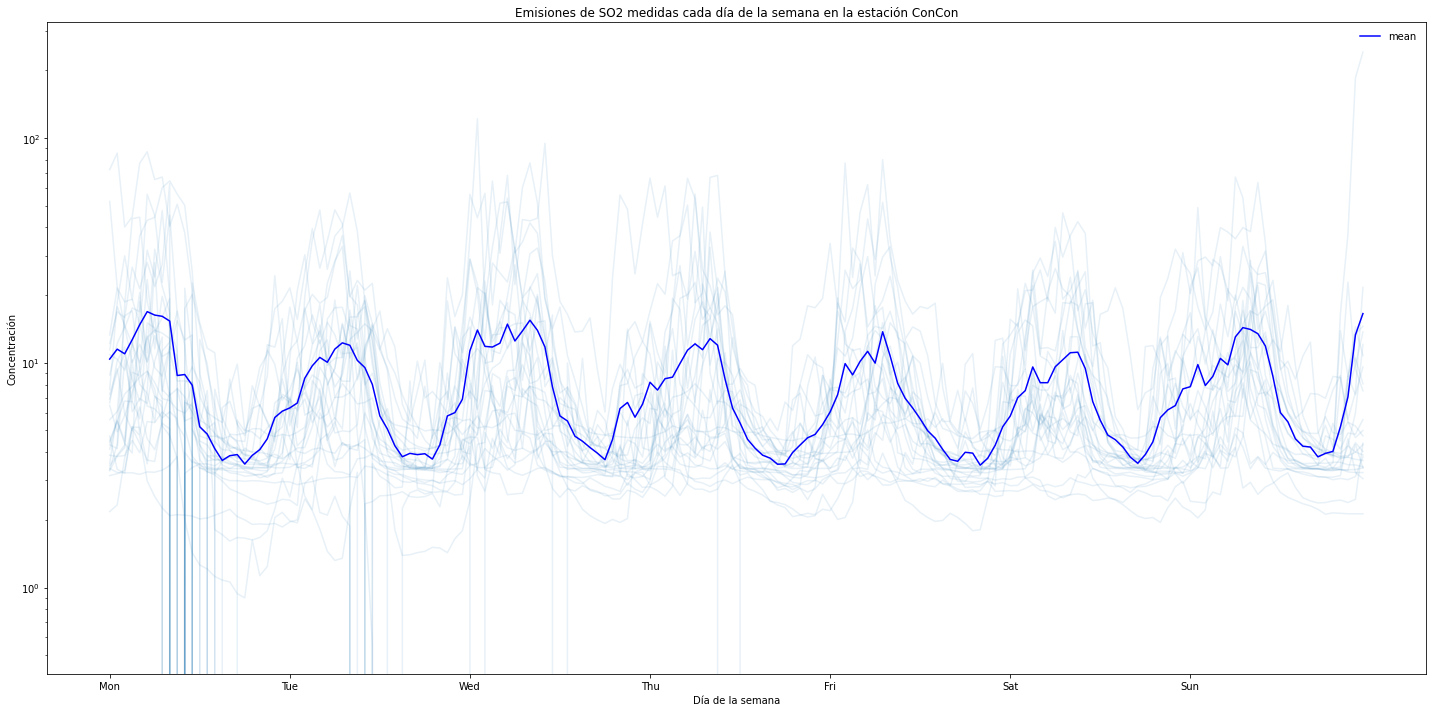

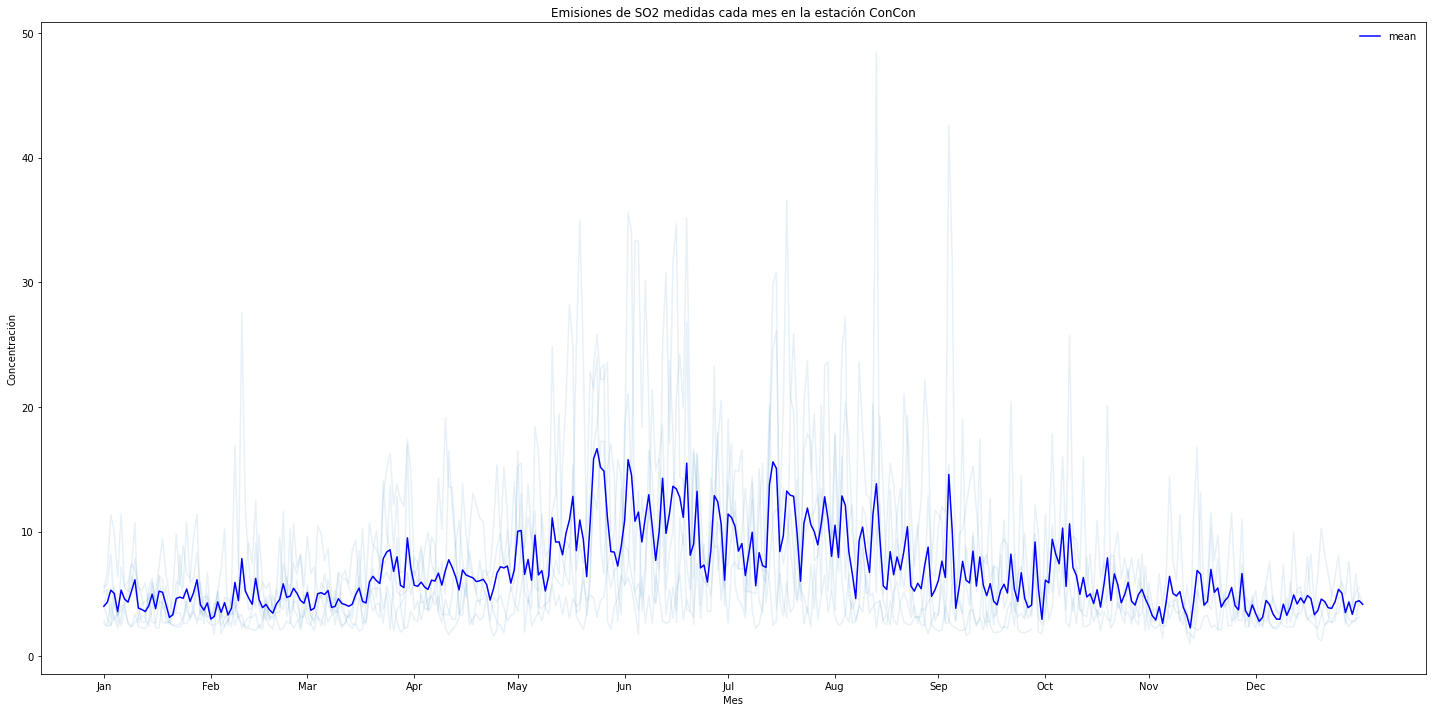

In [ ]:
visualizar_trends(concon_df, col = "SO2", ano_0=2019, log = True)

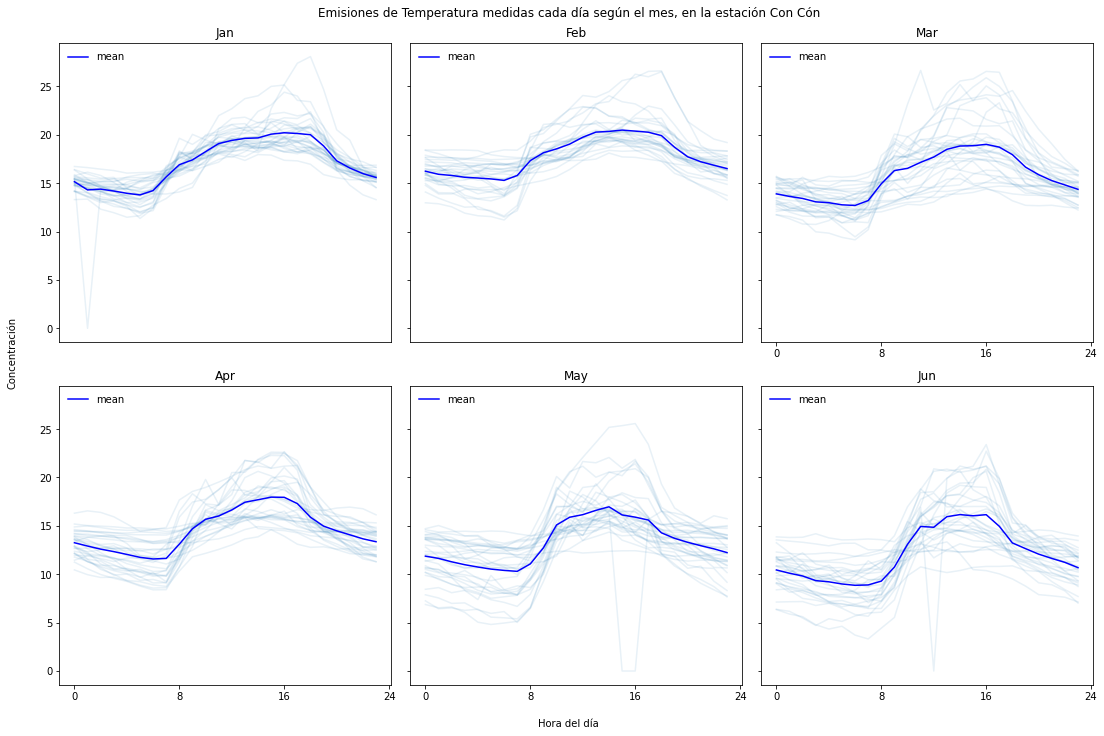

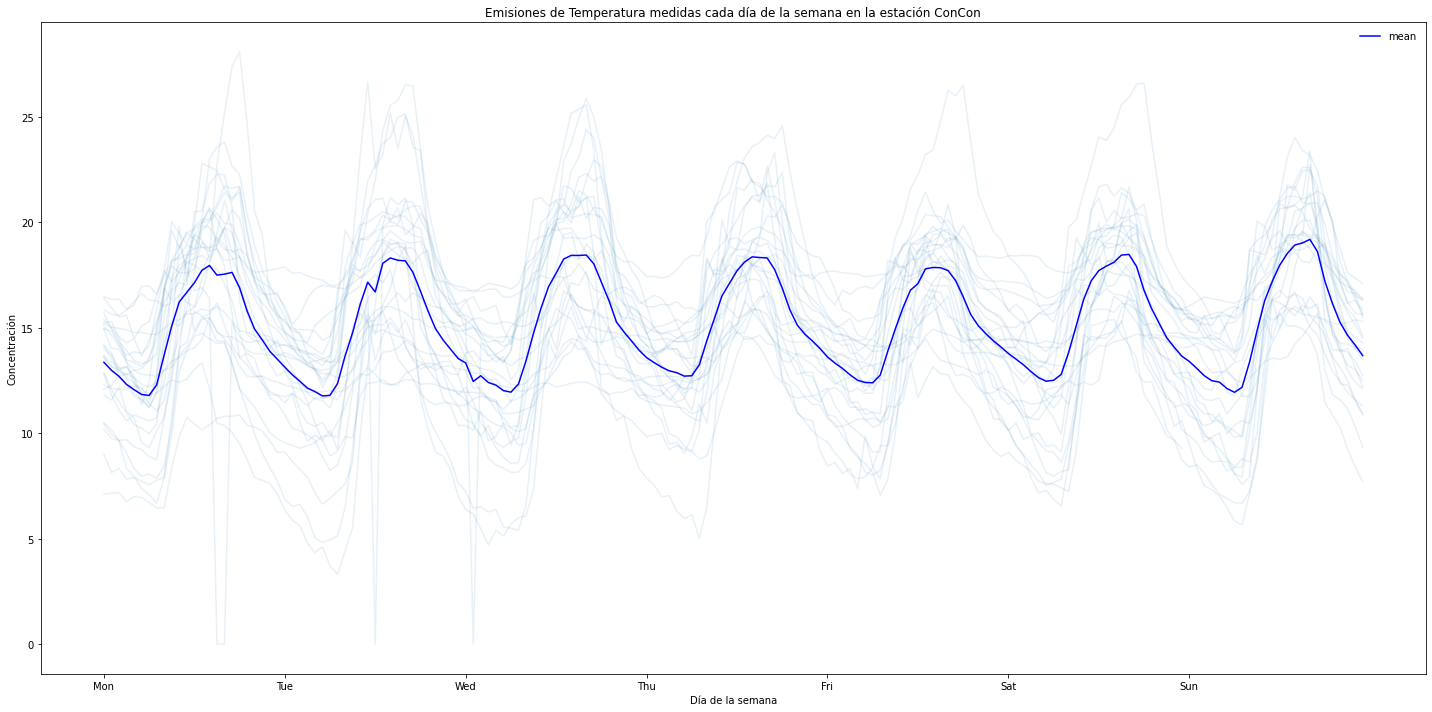

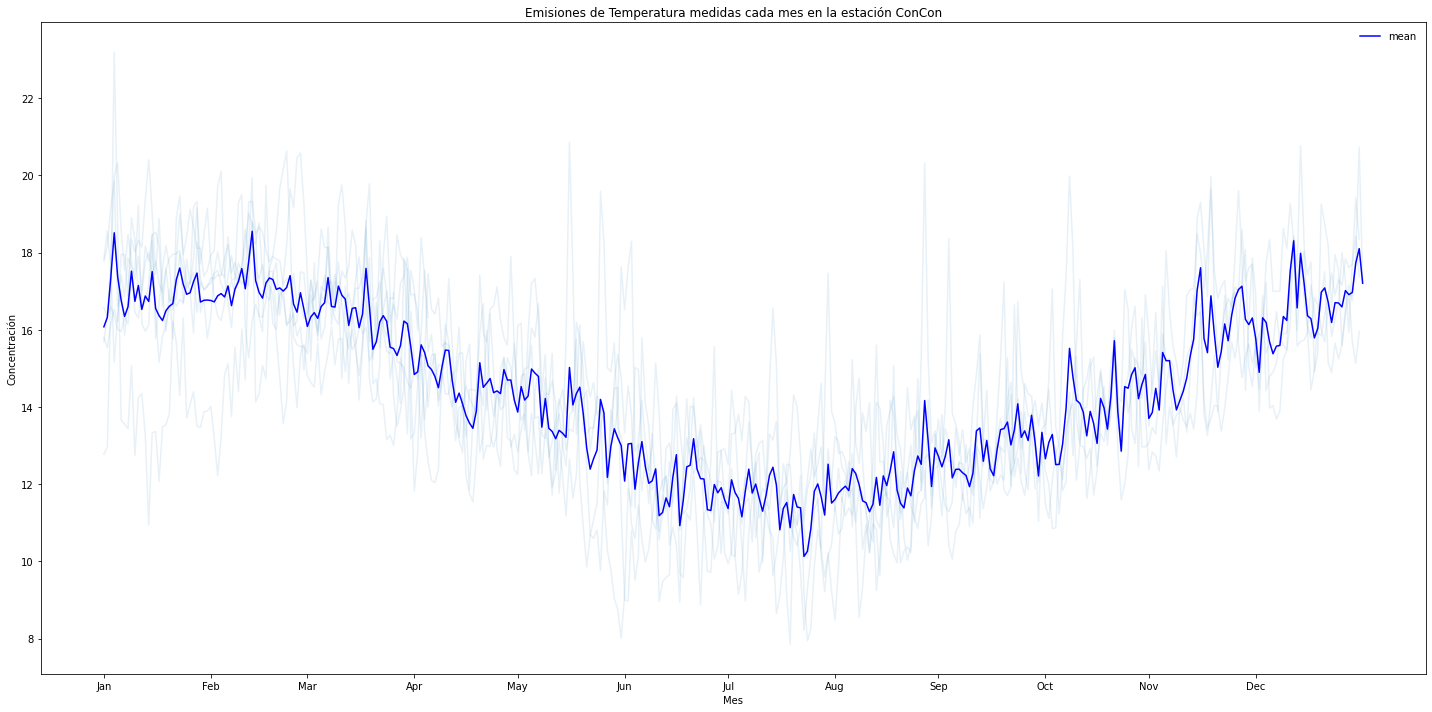

In [ ]:
visualizar_trends(concon_ma_df, col = "Temperatura", ano_0=2019)

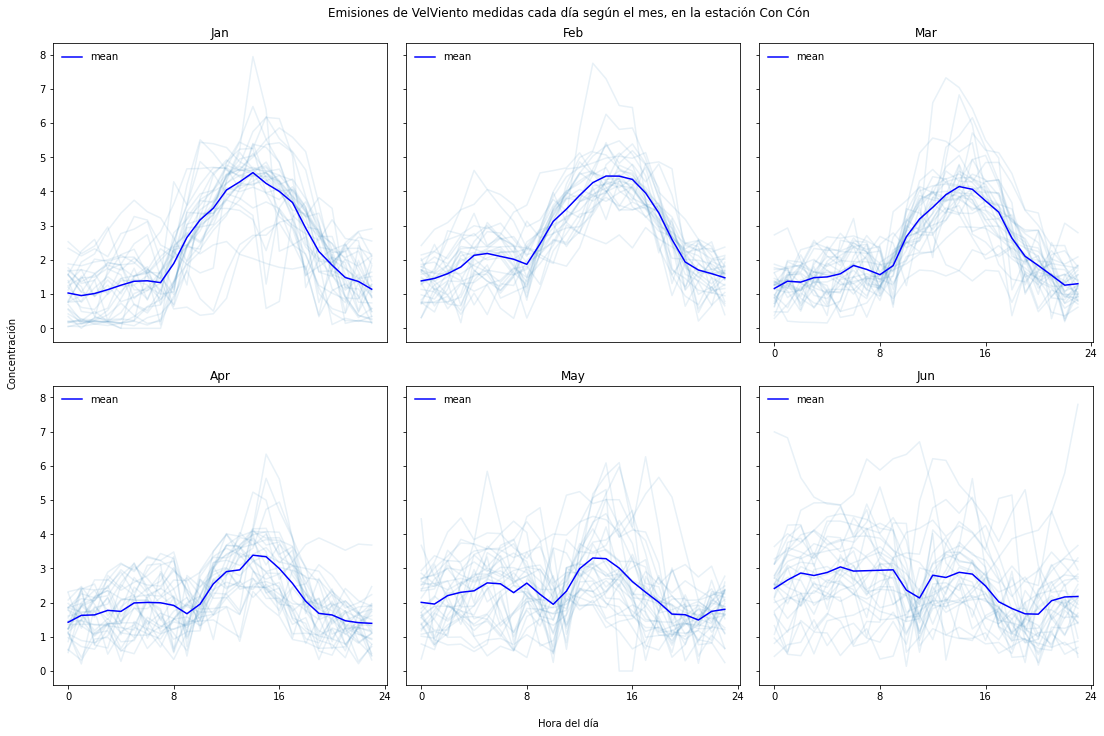

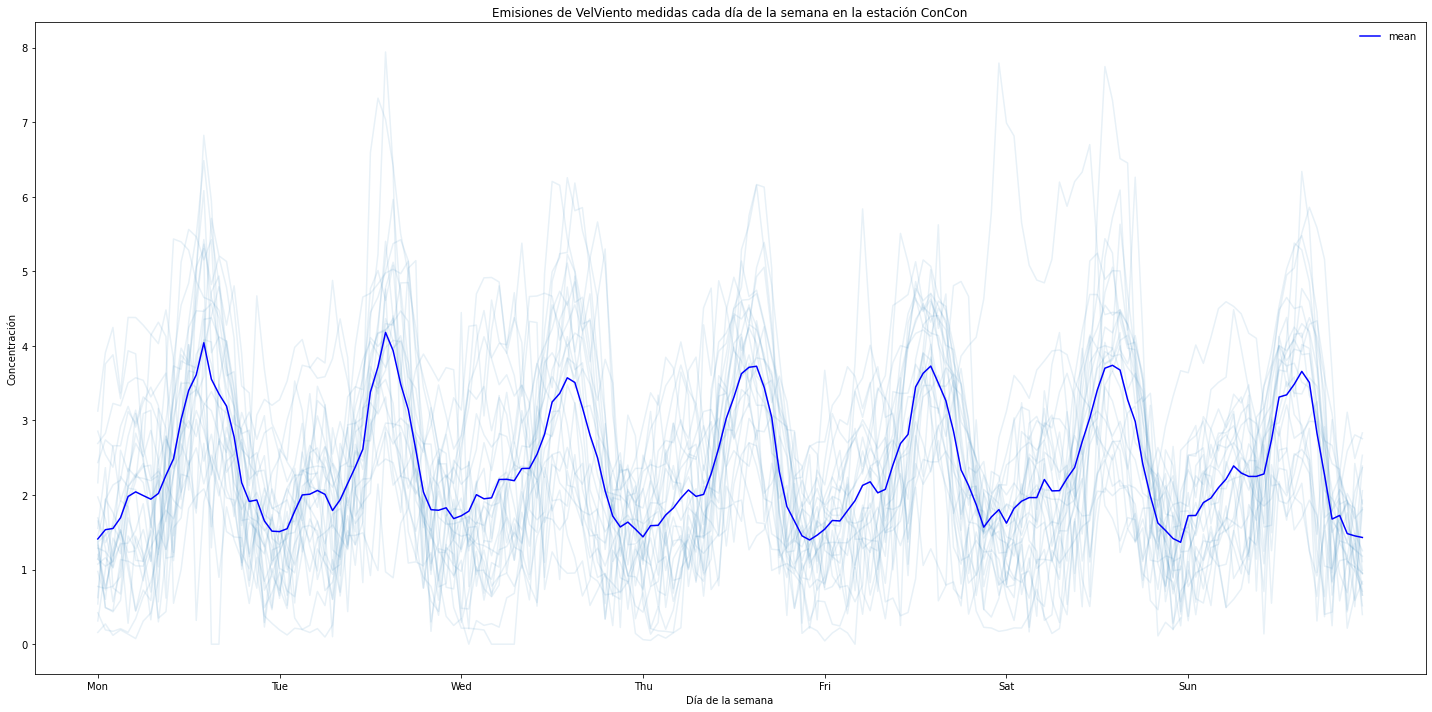

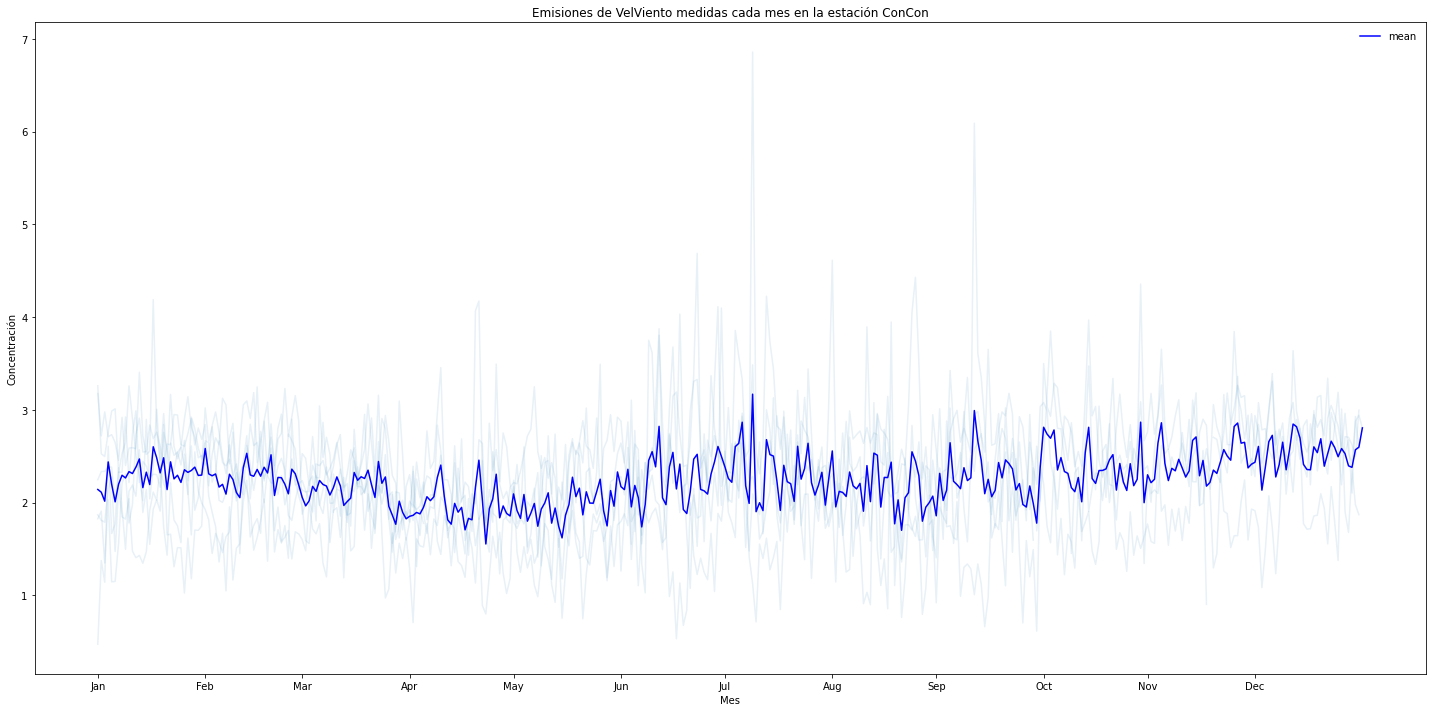

In [ ]:
visualizar_trends(concon_ma_df, col = "VelViento", ano_0=2019)

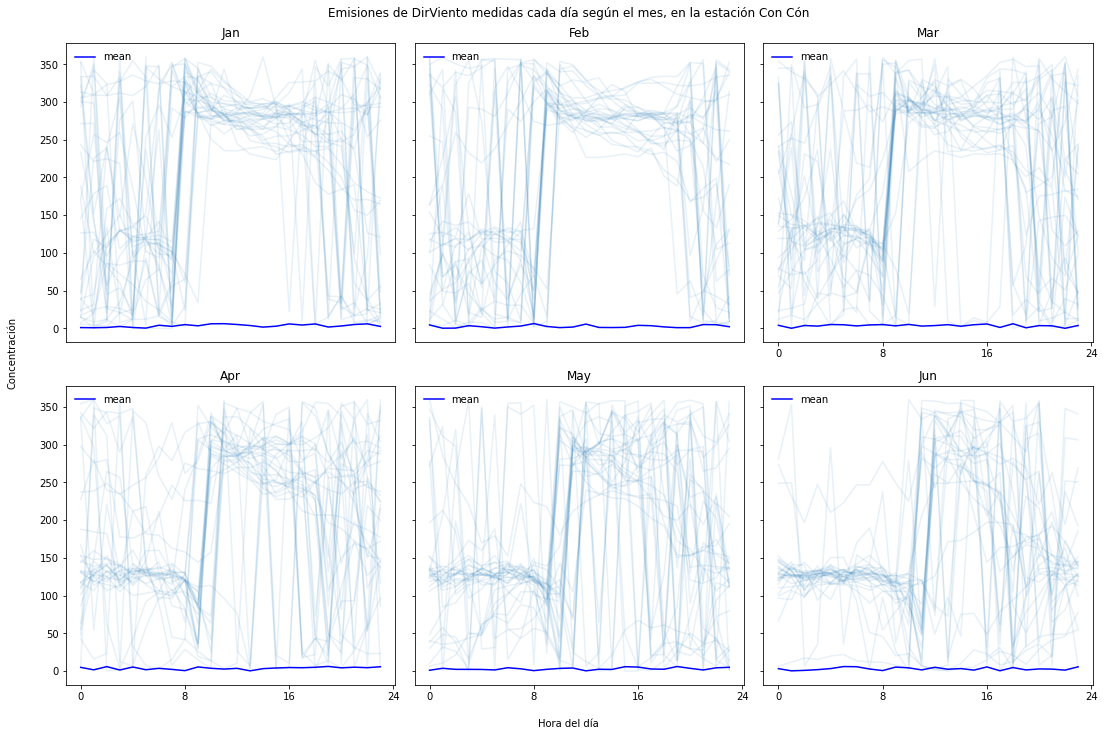

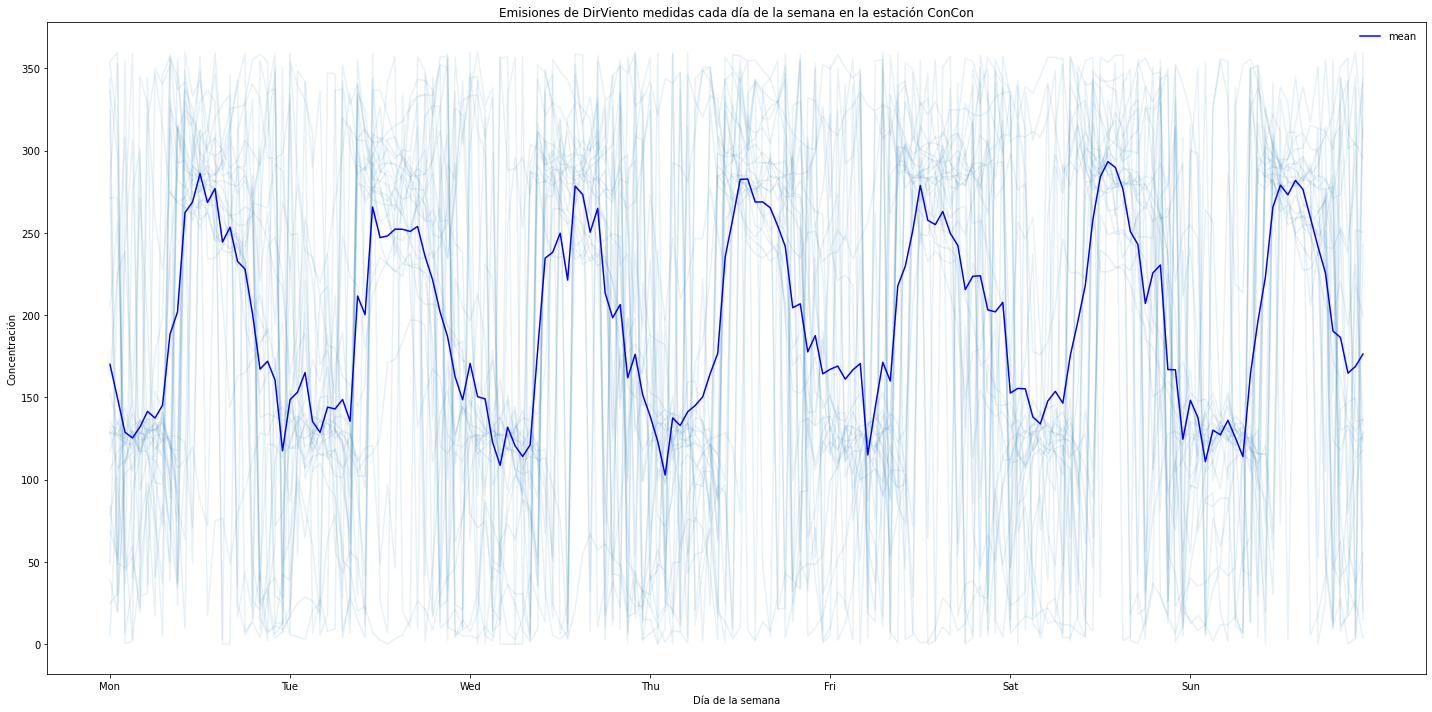

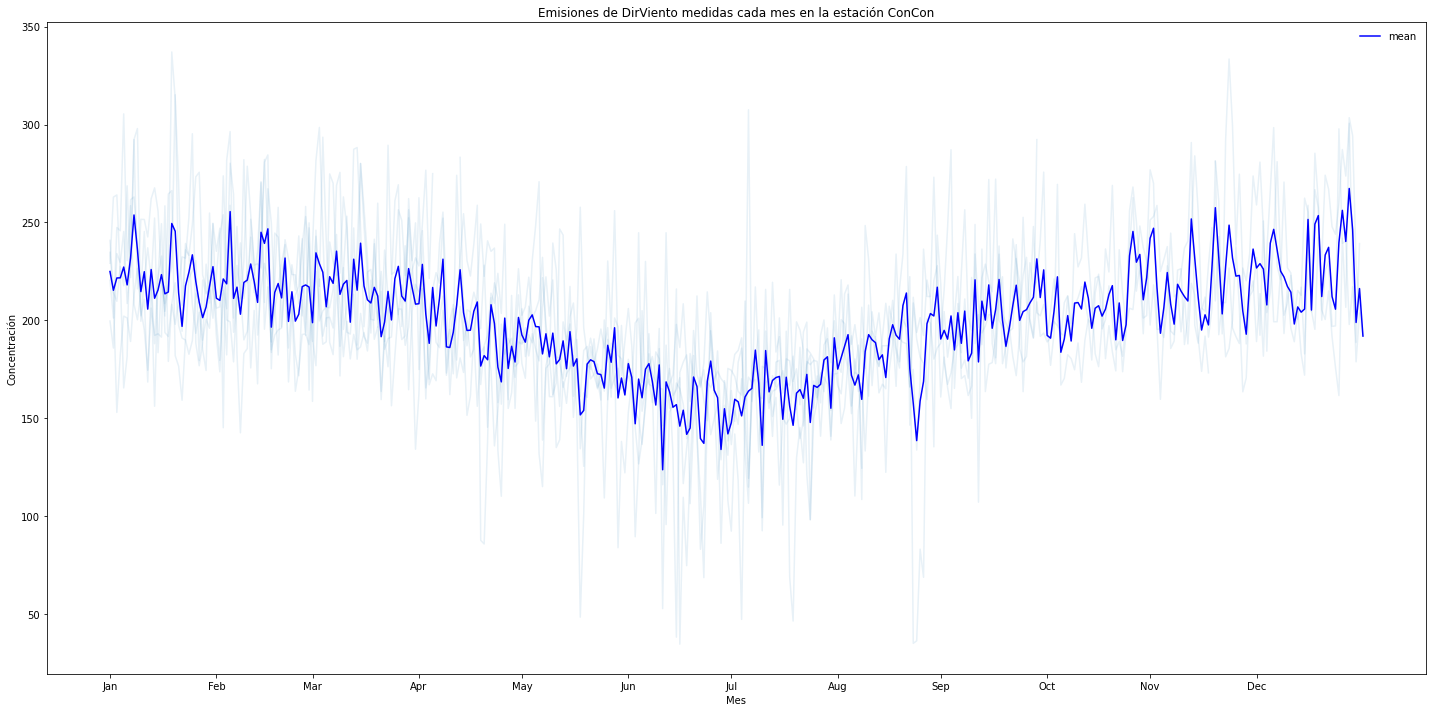

In [ ]:
visualizar_trends(concon_ma_df, col = "DirViento", ano_0=2019, circular = True)

C:\Users\javie\AppData\Local\Temp/ipykernel_15500/645881950.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aaa['rad'] = aaa.apply(lambda row: row.DirViento*np.pi/180, axis=1)


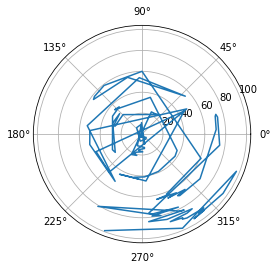

In [ ]:
aaa = concon_ma_df.iloc[-100:]
aaa['rad'] = aaa.apply(lambda row: row.DirViento*np.pi/180, axis=1)
plt.polar(aaa['rad'], range(len(aaa.values))) #aaa["VelViento"])
#concon_ma_df


In [ ]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()
trace1 = px.line_polar(theta=aaa["DirViento"], r=range(len(aaa.values)))
trace2 = px.scatter_polar(theta=aaa["DirViento"], r=range(len(aaa.values)), color=range(len(aaa.values)), color_continuous_scale='hot')

fig.add_trace(trace1.data[0])
fig.add_trace(trace2.data[0])

#fig = px.scatter_polar(df, r="frequency", theta="direction")
fig.show()

In [ ]:
concon_ma_df["VelViento"].apply(lambda x: np.mean(x), axis = 1)

TypeError: <lambda>() got an unexpected keyword argument 'axis'